### Here we will experiment with different strategies to do stage II disambiguation.

Split each S1 identity into a number of sub identities. Then, using the candidate record pairs found in stage II, compare the feature vectors of identity pairs that are linked because they were simply split as above, and those we are unsure about. Some of the latter will be the unknown Stage II links we hope to eventually uncover, so we can't classify the "not-yes" identity pairs as "no match".

Now the question is how to split up the identities. I want to assume that 

In [3]:
from disambiguation.core import utils
from disambiguation.core import Database, Record, Tokenizer, Person
from disambiguation import config
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re
%load_ext autoreload
%autoreload 2

individual_contributions_v2
newyork_combined_v2
usa_combined_v2
identities_v5
identities_adjacency_v5
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python2.7/dist-packages/scipy/__init__.py:111: UserWarning: Numpy 1.6.2 or above is recommended for this version of scipy (detected version 1.6.1)
  UserWarning)


In [3]:
idm = Database.IdentityManager('USA')
# idm.fetch_dict_id_2_identity()
# idm.fetch_dict_identity_2_id()
idm.fetch_dict_linked_identities()

Table 'identities_v5' exists.
Table 'identities_adjacency_v5' exists.
Table 'linked_identities_v5' exists.
select identity1, identity2 from linked_identities_v5;


In [275]:
idm.get_linked_identities('FL-157210')

[u'KS-20406', u'NY-202240']

In [278]:
set([]) or 1

1

In [282]:
a = 'NAVID'
b = a.encode('ascii')
c = a.encode('utf8')


c==b


True

In [271]:
# idm.deduce_linked_identities()
# idm.connection = idm.db_connect()
idm.export_linked_identities()
# idm.set_super_identities = idm.__get_set_super_identities(dict_super_identities)

Exporting linked_identities...
table linked_identities_v4 dropped successfully
Table 'linked_identities_v4' doesn't exist. Creating it.
table linked_identities_v4 initialized successfully
linked_identities truncated successfully.
linked_identities exported succesfully.
Total number of entries:  1330748


In [1]:
utils.config.MySQL_table_linked_identities
idm.set_super_identities

In [46]:
sizes = np.array([len(list_rids) for identity, list_rids in idm.dict_identity_2_list_ids.iteritems() ])


In [18]:
mu = np.mean(sizes)

# Poisson size distribution

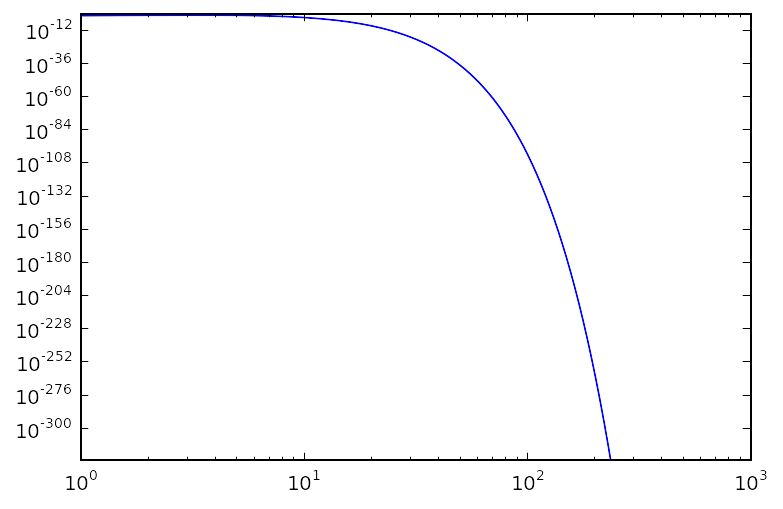

In [45]:
from scipy.stats import poisson
x = np.arange(0,1000)
plt.loglog(poisson.pmf(x, mu))

# Split'em! 

In [51]:
A = np.random.randint(1,20,1000)

In [70]:
B = []
for x in sizes:
    if np.random.rand() < 0.8:
        if x == 1: 
            B.append(x)
        y = x / 2
#         print y, x-y
        B.append(y)
        B.append(x-y)
    else:
        B.append(x)

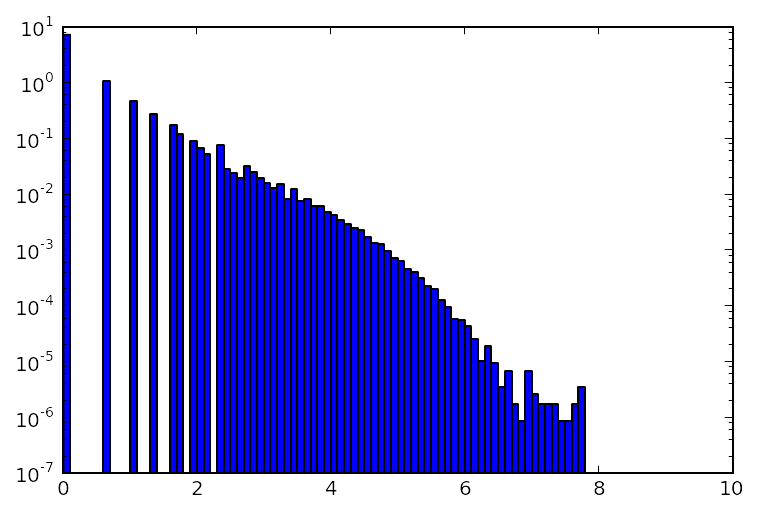

In [71]:
tmp1= plt.hist(np.log(B),100,log=True, range = (0,10), normed=True)

In [72]:
print len(B)
print len(sizes)

14526951
6460344


In [73]:
print np.mean(B)
print np.mean(sizes)

1.88373947155
3.78718393324


# Prototype for FEC disambiguation 

In [80]:
list_ids = xrange(100)
set_ids = set(list_ids)
dict_identity_2_list_ids = {}

counter = 1
while set_ids:
    identity = str(counter)
    try:
        L = [set_ids.pop() for i in range(np.random.randint(1,10))]
    except KeyError:
        L = list(set_ids)
    dict_identity_2_list_ids[identity] = L 
    counter += 1
    


In [81]:
dict_identity_2_list_ids

{'1': [0, 1, 2, 3, 4, 5, 6, 7, 8],
 '10': [34, 35],
 '11': [36, 37, 38, 39, 40, 41, 42, 43],
 '12': [44, 45, 46, 47, 48, 49, 50, 51, 52],
 '13': [53, 54, 55, 56, 57, 58],
 '14': [59, 60, 61, 62, 63, 64, 65],
 '15': [66, 67, 68, 69, 70, 71, 72],
 '16': [73, 74],
 '17': [75, 76, 77, 78, 79, 80, 81],
 '18': [82, 83, 84, 85, 86, 87, 88, 89],
 '19': [90],
 '2': [9],
 '20': [91, 92],
 '21': [93, 94, 95, 96, 97, 98, 99],
 '3': [10],
 '4': [11, 12, 13, 14],
 '5': [15, 16, 17, 18],
 '6': [19, 20, 21, 22, 23],
 '7': [24],
 '8': [25, 26, 27, 28, 29, 30],
 '9': [31, 32, 33]}

## Split 

In [ ]:
def split_dict_identity_ids(dict_identity_2_list_ids, split_prob = 0.8):
    '''
    Take a dict_identity_2_list_ids such as the one found
    in L{IdentityManager} and split the identities at random.
    '''
    # split_prob = 0.8
    dict_identity_2_list_ids_split = {}
    dict_id_2_identity_split = {}
    for identity, list_ids in dict_identity_2_list_ids.iteritems():
        x = len(list_ids)
        if np.random.rand() < split_prob and x > 1:          
            y = x / 2
            identity_sub_1 = identity + "|1" 
            identity_sub_2 = identity + "|2"
            dict_identity_2_list_ids_split[identity_sub_1] = list_ids[:y]
            dict_identity_2_list_ids_split[identity_sub_2] = list_ids[y:]
            
            for rid in list_ids[:y]:
                dict_id_2_identity_split[rid] = identity_sub_1
            for rid in list_ids[y:]:
                dict_id_2_identity_split[rid] = identity_sub_2

        else:
            dict_identity_2_list_ids_split[identity] = list_ids
            for rid in list_ids:
                dict_id_2_identity_split[rid] = identity
    return dict_identity_2_list_ids_split, dict_id_2_identity_split


In [108]:
dict_identity_2_list_ids_split = \
    split_dict_identity_2_list_ids(dict_identity_2_list_ids, 0.2)
dict_identity_2_list_ids_split


{'1': [0, 1, 2, 3, 4, 5, 6, 7, 8],
 '10': [34, 35],
 '11': [36, 37, 38, 39, 40, 41, 42, 43],
 '12|1': [44, 45, 46, 47],
 '12|2': [48, 49, 50, 51, 52],
 '13': [53, 54, 55, 56, 57, 58],
 '14': [59, 60, 61, 62, 63, 64, 65],
 '15': [66, 67, 68, 69, 70, 71, 72],
 '16|1': [73],
 '16|2': [74],
 '17': [75, 76, 77, 78, 79, 80, 81],
 '18': [82, 83, 84, 85, 86, 87, 88, 89],
 '19': [90],
 '2': [9],
 '20': [91, 92],
 '21': [93, 94, 95, 96, 97, 98, 99],
 '3': [10],
 '4': [11, 12, 13, 14],
 '5': [15, 16, 17, 18],
 '6': [19, 20, 21, 22, 23],
 '7': [24],
 '8': [25, 26, 27, 28, 29, 30],
 '9|1': [31],
 '9|2': [32, 33]}

# TEST 

In [3]:
idm = Database.IdentityManager('USA')
idm.fetch_dict_id_2_identity()
idm.fetch_dict_identity_2_id()

# The split version of dict_identity_2_list_ids
dict_identity, dict_id = split_dict_identity_ids(idm.dict_identity_2_list_ids,0.5)


# An idm loaded with the split dictionaries.
idm_split = Database.IdentityManager('USA')
idm_split.dict_identity_2_list_ids = dict_identity
idm_split.dict_id_2_identity = dict_id



Table 'identities_v3' exists.
Table 'identities_adjacency_v3' exists.
select id,identity from identities_v3;
select id,identity from identities_v3;
Table 'identities_v3' exists.
Table 'identities_adjacency_v3' exists.


In [6]:
import stage2

In [126]:
stage2.partition_S1_identities(10,idm = idm_split)

Generating list of identity pairs to be compared...
Done.
List of identity pairs written to file.
List of identity pairs divided into partitions.
Saving identity pair partitions to separate files...
Done.


In [2]:
stage2.compute_person_tokens()

## Perform Stage II disambiguation
***
> we can write something in block quotes
> like so.

And then, we can make lists:
1. Item number one
2. item number two

Opening data files for partition  0
    Graph loaded.
Opening data files for partition  1
    Graph loaded.
Opening data files for partition  2
    Graph loaded.
Opening data files for partition  3
    Graph loaded.
Opening data files for partition  4
    Graph loaded.
Opening data files for partition  5
    Graph loaded.
Opening data files for partition  6
    Graph loaded.
Opening data files for partition  7
    Graph loaded.
Opening data files for partition  8
    Graph loaded.
Opening data files for partition  9
    Graph loaded.
Starting worker pool...


# Combined code


In [8]:
# idm = Database.IdentityManager('USA')
# idm.fetch_dict_id_2_identity()
# idm.fetch_dict_identity_2_id()

# The split version of dict_identity_2_list_ids
# dict_identity, dict_id = split_dict_identity_ids(idm.dict_identity_2_list_ids,0.5)


# # An idm loaded with the split dictionaries.
# idm_split = Database.IdentityManager('USA')
# idm_split.dict_identity_2_list_ids = dict_identity
# idm_split.dict_id_2_identity = dict_id

# Perform disambituation
stage2.disambiguate_subsets_multiproc(num_partitions=10, state="USA", num_procs=10, idm = idm_split)


Opening data files for partition  0
    Graph loaded.
Opening data files for partition  1
    Graph loaded.
Opening data files for partition  2
    Graph loaded.
Opening data files for partition  3
    Graph loaded.
Opening data files for partition  4
    Graph loaded.
Opening data files for partition  5
    Graph loaded.
Opening data files for partition  6
    Graph loaded.
Opening data files for partition  7
    Graph loaded.
Opening data files for partition  8
    Graph loaded.
Opening data files for partition  9
    Graph loaded.
Starting worker pool...


Exception KeyboardInterrupt in <module 'threading' from '/usr/lib/python2.7/threading.pyc'> ignored


KeyboardInterrupt: 

In [13]:
counter = 0
for identity, list_ids in idm_split.dict_identity_2_list_ids.iteritems():
    print identity
    print [idm_split.get_identity(rid) for rid in idm_split.get_ids(identity)]
    print "-" * 50, "\n"
    counter += 1
    if counter > 2000: break
    

In [13]:
import cPickle

In [14]:
a = range(10)
cPickle.load()

TypeError: argument must have 'write' attribute

In [3]:
utils.json.dumps([(1,'a'),(1,None),2,3,4])

'[[1, "a"], [1, null], 2, 3, 4]'

# Interpreting the bootstraping results 

In [4]:
import re
set_identity = set()
split_matches = []
non_split_matches = []
filename = config.S2_bootstrap_results_file
with open(filename) as f:
    counter = 0
    counter_line = 0
    counter_both = 0
    counter_non_match = 0
    for line in f:
        counter_line += 1
        data = utils.json.loads(line)
        

        match1 = re.findall(r'(.*)\|([12])', data[0])
        match2 = re.findall(r'(.*)\|([12])', data[1])
        if match1:
            set_identity.add(data[0])
        elif match2:
            set_identity.add(data[1])
        
        if not match1 or not match2:
            non_split_matches.append(data[2:])
            counter_non_match += 1
            
        
        if match1 and match2 :
            counter_both += 1
#             print match1[0][0], match2[0][0]
            if match1[0][0] == match2[0][0]:
                counter += 1
#                 print data
                split_matches.append(data[2:])
#                 break
#                 print match1, match2

#                 print data[0], data[1]

        
        

IOError: [Errno 2] No such file or directory: '/nfs/home/navid/data/FEC-v5/identities/S2_bootstrap_results.txt'

In [4]:
print counter
print counter_line
print counter_both
print counter_non_match

599229
865509
656853
208656


In [6]:
print counter
print counter_line
print counter_both
print counter_non_match

599229
865509
656853
208656


In [7]:
print len(set_identity)


685471


In [7]:
# def process_bootstrapping_results():
split_matches, non_split_matches = stage2.__get_split_matches()


filter_occupation_2 = lambda x: (x[1][0] == 2) # occupation
filter_employer_2 = lambda x: (x[2][0] == 2) # employer

filter_occupation_3 = lambda x: (x[1][0] == 3) # occupation
filter_employer_3 = lambda x: (x[2][0] == 3) # employer

filter_occupation_4 = lambda x: (x[1][0] == 4) # occupation
filter_employer_4 = lambda x: (x[2][0] == 4) # employer

filter_name_3 = lambda x: (x[0][0] == 3) # name = 3
filter_name_4 = lambda x: (x[0][0] == 4) # name = 3


# frequencies if occupations are linked
#     f_n_4_o_2_middle = np.asarray([x[0][1][0] if filter_occupation_2(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
#     f_n_4_o_2 = np.asarray([x[0][1][1] if filter_occupation_2(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
f_n_3_o_2 = np.asarray([x[0][1][1] if filter_occupation_2(x) and filter_name_3(x) else None for x in split_matches ], dtype=np.float)


# frequencies if occupations are linked
#     f_n_4_o_3_middle = np.asarray([x[0][1][0] if filter_occupation_3(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
#     f_n_4_o_3 = np.asarray([x[0][1][1] if filter_occupation_3(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
f_n_3_o_3 = np.asarray([x[0][1][1] if filter_occupation_3(x) and filter_name_3(x) else None for x in split_matches ], dtype=np.float)


# frequencies if occupations are identical
#     f_n_4_o_4_middle = np.asarray([x[0][1][0] if filter_occupation_4(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
#     f_n_4_o_4 = np.asarray([x[0][1][1] if filter_occupation_4(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
f_n_3_o_4 = np.asarray([x[0][1][1] if filter_occupation_4(x) and filter_name_3(x) else None for x in split_matches ], dtype=np.float)






# frequencies if employers are linked
#     f_n_4_e_2_middle = np.asarray([x[0][1][0] if filter_employer_2(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
#     f_n_4_e_2 = np.asarray([x[0][1][1] if filter_employer_2(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
f_n_3_e_2 = np.asarray([x[0][1][1] if filter_employer_2(x) and filter_name_3(x) else None for x in split_matches ], dtype=np.float)

# frequencies if employers are linked
#     f_n_4_e_3_middle = np.asarray([x[0][1][0] if filter_employer_3(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
#     f_n_4_e_3 = np.asarray([x[0][1][1] if filter_employer_3(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
f_n_3_e_3 = np.asarray([x[0][1][1] if filter_employer_3(x) and filter_name_3(x) else None for x in split_matches ], dtype=np.float)

# frequencies if employers are identical
#     f_n_4_e_4_middle = np.asarray([x[0][1][0] if filter_employer_4(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
#     f_n_4_e_4 = np.asarray([x[0][1][1] if filter_employer_4(x) and filter_name_4(x) else None for x in split_matches ], dtype=np.float)
f_n_3_e_4 = np.asarray([x[0][1][1] if filter_employer_4(x) and filter_name_3(x) else None for x in split_matches ], dtype=np.float)





# Get a list of tuples, each one acceptable point coordinate
#     inds_n_4_o_4 = __heatmap(f_n_4_o_4, f_n_4_o_4_middle, 'Log-histogram of matches with \n identical occupations', 1,\
#             aspect = 0.05, xlim=(0,20), ylim=(0,400))
#     inds_n_4_e_4 = __heatmap(f_n_4_e_4, f_n_4_e_4_middle, 'Log-histogram of matches with \n identical employers', 2,\
#             aspect = 0.05, xlim=(0,20), ylim=(0,400))
#     inds_n_4_o_3 = __heatmap(f_n_4_o_3, f_n_4_o_3_middle, 'Log-histogram of matches with \n LINKED occupations', 3,\
#             aspect = 0.2, xlim=(0,15), ylim=(0,100))
#     inds_n_4_e_3 = __heatmap(f_n_4_e_3, f_n_4_e_3_middle, 'Log-histogram of matches with \n LINKED employers', 4,\
#             aspect = 0.2, xlim=(0,15), ylim=(0,100))

#     inds_n_4_o_2 = __heatmap(f_n_4_o_2, f_n_4_o_2_middle, 'Log-histogram of matches with \n BAD occupations', 5,\
#             aspect = 0.2, xlim=(0,15), ylim=(0,100))
#     inds_n_4_e_2 = __heatmap(f_n_4_e_2, f_n_4_e_2_middle, 'Log-histogram of matches with \n BAD employers', 6,\
#             aspect = 0.2, xlim=(0,15), ylim=(0,100))

#     filename_inds_n_4_o_4 = config.filename_inds_n_4_o_4
#     filename_inds_n_4_e_4 = config.filename_inds_n_4_e_4
#     filename_inds_n_4_o_3 = config.filename_inds_n_4_o_3
#     filename_inds_n_4_e_3 = config.filename_inds_n_4_e_3
#     filename_inds_n_4_o_2 = config.filename_inds_n_4_o_2
#     filename_inds_n_4_e_2 = config.filename_inds_n_4_e_2

try:
    pass
#         with open(filename_inds_n_4_o_4, 'w') as f:
#             utils.json.dump(inds_n_4_o_4, f)

#         with open(filename_inds_n_4_e_4, 'w') as f:
#             utils.json.dump(inds_n_4_e_4, f)

#         with open(filename_inds_n_4_o_3, 'w') as f:
#             utils.json.dump(inds_n_4_o_3, f)

#         with open(filename_inds_n_4_e_3, 'w') as f:
#             utils.json.dump(inds_n_4_e_3, f)

#         with open(filename_inds_n_4_o_2, 'w') as f:
#             utils.json.dump(inds_n_4_o_2, f)

#         with open(filename_inds_n_4_e_2, 'w') as f:
#             utils.json.dump(inds_n_4_e_2, f)
except Exception as e:
    print "ERROR: unable to export ind files."
    raise e


IOError: [Errno 2] No such file or directory: '/nfs/home/navid/data/FEC-v5/identities/S2_bootstrap_results.txt'

# The n=3 results 

32
43
50
36
41
48


'{"e_3": 43, "e_2": 32, "o_3": 41, "e_4": 50, "o_4": 48, "o_2": 36, "README": "This dictionary contains stage II 95 percentile name frequency thresholds for various affiliation match scores in the case where names match but not on the middle name. e_2 means the case where employers have a match score of 2. o_2 is the same for occupations, etc."}'

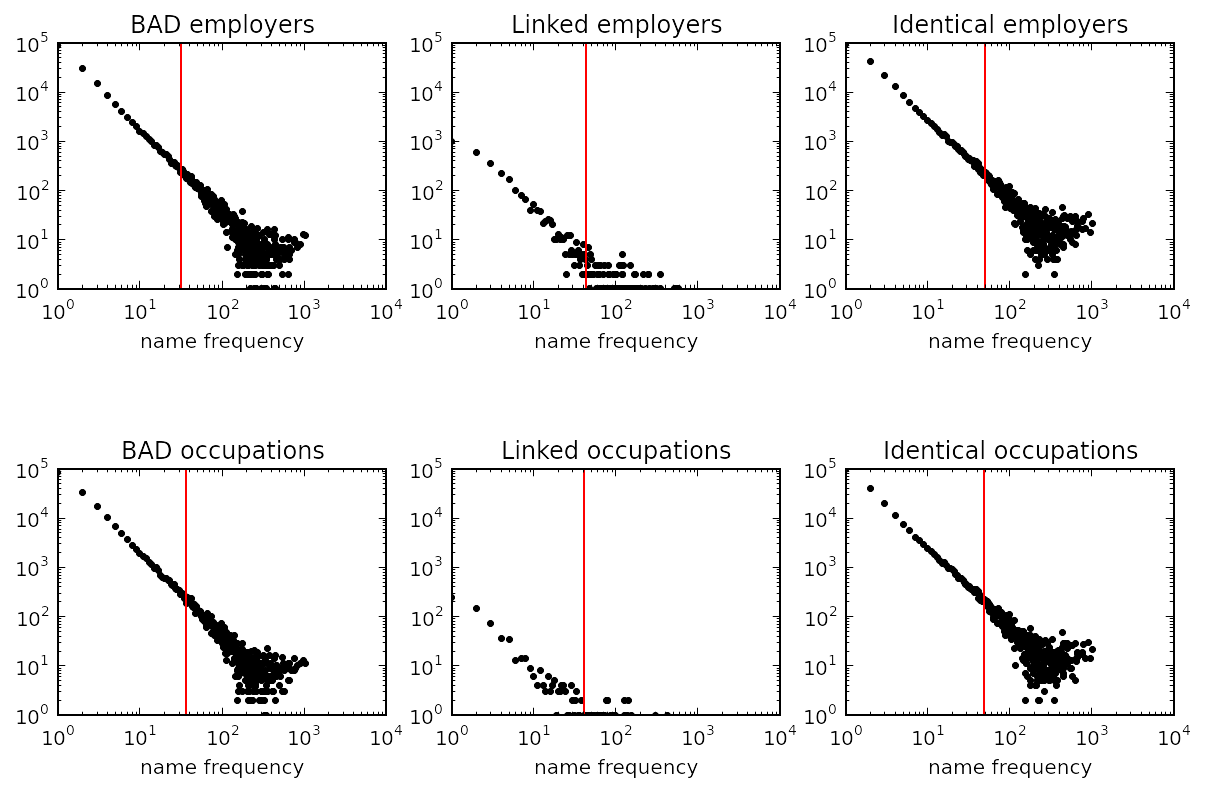

In [155]:
cum_percent = 95

def threshold_freqs(xx,cum_percent, subplot, title = ''):

    def get_1d_threshold(freqs, cum_percent):
        '''
        Given a descending list of frequencies, compute the
        index of the entry x such that the cumulative sum of
        all entries up to x is C{cum_percent} percent of the
        sum of all entries.
        '''

        cumsums = np.cumsum(freqs)
        total = cumsums[-1]
        threshold = total * (cum_percent / 100.0)
        return np.where(cumsums > threshold)[0][0]

    plt.subplot(2,3,subplot)
    
    bins = np.arange(0,1200)-0.5
    indices = np.where(~np.isnan(xx))[0]
    # plt.hist(xx[indices],bins = bins)
    freqs, xs = np.histogram(xx[indices],bins = bins)
    # freqs = freqs[:-1]
    centers = ((xs[:-1] + xs[1:])/2).astype(int)
    plt.loglog(centers,freqs,'.k')
    threshold = get_1d_threshold(freqs, cum_percent)
    t = threshold
    print t
    plt.loglog([t,t] , [1, 1e5],'r')
    plt.ylim((1,1e5))
    plt.xlabel('name frequency')
    plt.gca().set_aspect(0.6)
    plt.title(title)
    return int(threshold)

plt.figure(figsize=(10,7))

# dict of name frequency thresholds for the case
# when there is no middle name match.
thresholds = {}
thresholds['README'] = "This dictionary contains stage II 95 percentile name frequency thresholds \
for various affiliation match scores in the case where names \
match but not on the middle name. e_2 means the case where employers \
have a match score of 2. o_2 is the same for occupations, etc."
thresholds['e_2'] = threshold_freqs(f_n_3_e_2, cum_percent,1, title = 'BAD employers')
thresholds['e_3'] = threshold_freqs(f_n_3_e_3, cum_percent,2, title = 'Linked employers')
thresholds['e_4'] = threshold_freqs(f_n_3_e_4, cum_percent,3, title = 'Identical employers')

thresholds['o_2'] = threshold_freqs(f_n_3_o_2, cum_percent,4, title = 'BAD occupations')
thresholds['o_3'] = threshold_freqs(f_n_3_o_3, cum_percent,5, title = 'Linked occupations')
thresholds['o_4'] = threshold_freqs(f_n_3_o_4, cum_percent,6, title = 'Identical occupations')
utils.json.dumps(thresholds)




In [171]:

v = stage2.VerdictAuthority()
v.inds_n_3

VerdictAuthority instantiated.


{u'README': u'This dictionary contains stage II 95 percentile name frequency thresholds     for various affiliation match scores in the case where names     match but not on the middle name. e_2 means the case where employers     have a match score of 2. o_2 is the same for occupations, etc.',
 u'e_2': 32,
 u'e_3': 43,
 u'e_4': 50,
 u'o_2': 36,
 u'o_3': 41,
 u'o_4': 48}

In [177]:
print v.verdict(((4, (0, 50)), (2, None), (2, None)))

1


In [151]:
print thresholds
utils.json.dumps(thresholds)

{'e_3': 43, 'e_2': 32, 'o_3': 41, 'o_4': 48, 'o_2': 36, 'e_4': 50}


TypeError: 43 is not JSON serializable

In [110]:
print len(centers), len(freqs)


1199 1198


# Combined affiliation results 

In [9]:

# frequencies if employers are identical
f_oe_4_middle = np.asarray([x[0][1][0] if filter_employer_4(x) and filter_occupation_4(x) else None for x in split_matches ], dtype=np.float)
f_oe_4 = np.asarray([x[0][1][1] if filter_employer_4(x) and filter_occupation_4(x) else None for x in split_matches ], dtype=np.float)

# frequencies if employers are identical
nf_oe_4_middle = np.asarray([x[0][1][0] if filter_employer_4(x) and filter_occupation_4(x) else None for x in non_split_matches ], dtype=np.float)
nf_oe_4 = np.asarray([x[0][1][1] if filter_employer_4(x) and filter_occupation_4(x) else None for x in non_split_matches ], dtype=np.float)


In [6]:
f_o_2

array([ nan,  nan,  nan, ...,  nan,  nan,   3.])

In [4]:
def myformat(i):
    return str(i).ljust(10,' ')
    
print "bad employer"
print "=" * 40
print myformat(sum(f_e_2 > -1)), 'matches with bad employer'
print myformat(sum(f_o_2> -1)), 'matches with bad occupation'
    
    
print "Linked"
print "=" * 40
print myformat(sum(f_e_3 > -1)), 'matches with LINKED employer'
print myformat(sum(f_o_3> -1)), 'matches with LINKED occupation'
print
print myformat(sum(nf_e_3 > -1)), 'NON-matches with LINKED employer'
print myformat(sum(nf_o_3 > -1)), 'NON-matches with LINKED occupation'
print
print
print

print "Identical"
print "=" * 40
print myformat(sum(f_e_4 > -1)), 'matches with IDENTICAL employer'
print myformat(sum(f_o_4 > -1)), 'matches with IDENTICAL occupation'
print
print myformat(sum(nf_e_4 > -1)), 'NON-matches with IDENTICAL employer'
print myformat(sum(nf_o_4 > -1)), 'NON-matches with IDENTICAL occupation'
print
print

print myformat(sum(f_oe_4 > -1)), 'matches with IDENTICAL employer AND occupation'
print myformat(sum(nf_oe_4 > -1)), 'NON-matches with IDENTICAL employer AND occupation'
print

bad employer
103344     matches with bad employer
151562     matches with bad occupation
Linked
4801       matches with LINKED employer
5146       matches with LINKED occupation

3129       NON-matches with LINKED employer
12947      NON-matches with LINKED occupation



Identical
490457     matches with IDENTICAL employer
442054     matches with IDENTICAL occupation

156572     NON-matches with IDENTICAL employer
78775      NON-matches with IDENTICAL occupation




NameError: name 'f_oe_4' is not defined

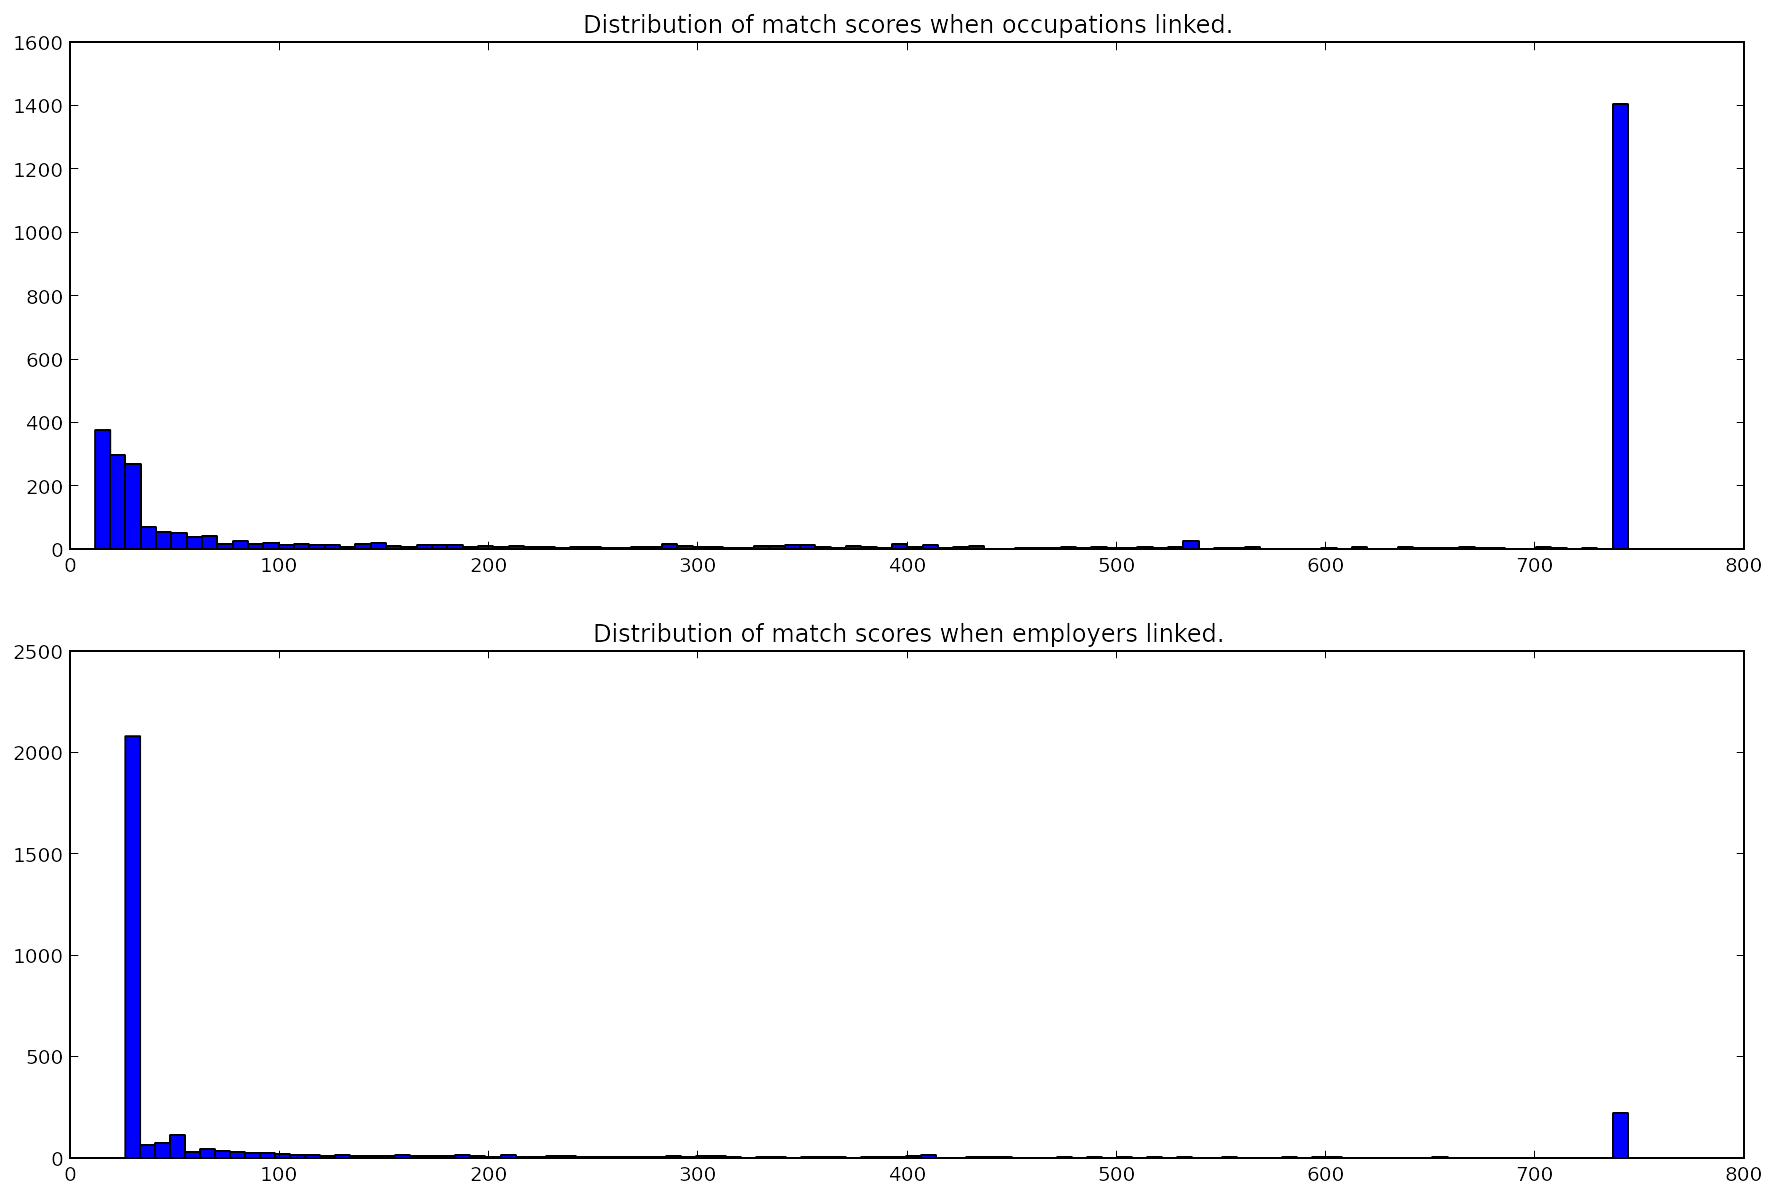

In [8]:
plt.rcParams['figure.figsize'] = 15, 10

plt.subplot(2,1,1)
tmp=plt.hist([x for x in s_o_3 if x is not None], 100)
plt.title('Distribution of match scores when occupations linked.')

plt.subplot(2,1,2)
tmp=plt.hist([x for x in s_e_3 if x is not None], 100)
plt.title('Distribution of match scores when employers linked.')

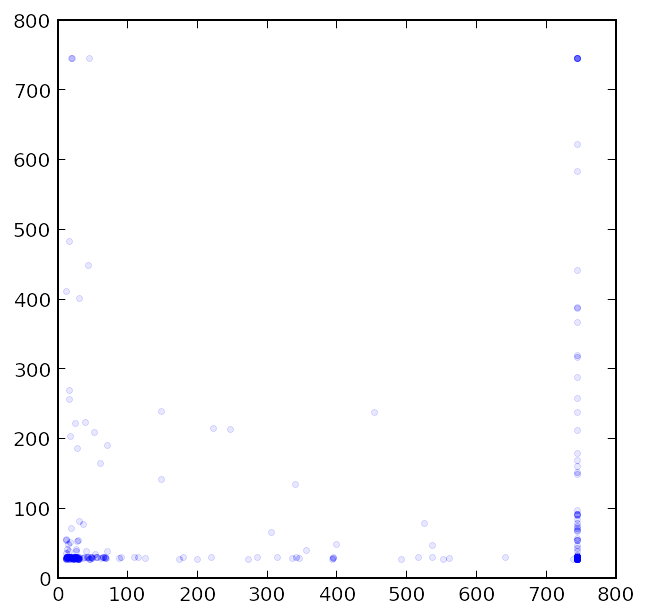

In [23]:
# all points with e and o equal 3, and score not None.
plt.rcParams['figure.figsize'] = 5, 5
s_both_filtered = [x for x in s_both if x[0] is not None and x[1] is not None]
tmp = np.array(s_both_filtered)
plt.plot(tmp[:,0], tmp[:,1], '.', alpha = 0.3)

In [20]:
len(s_both)

298

# Matches 

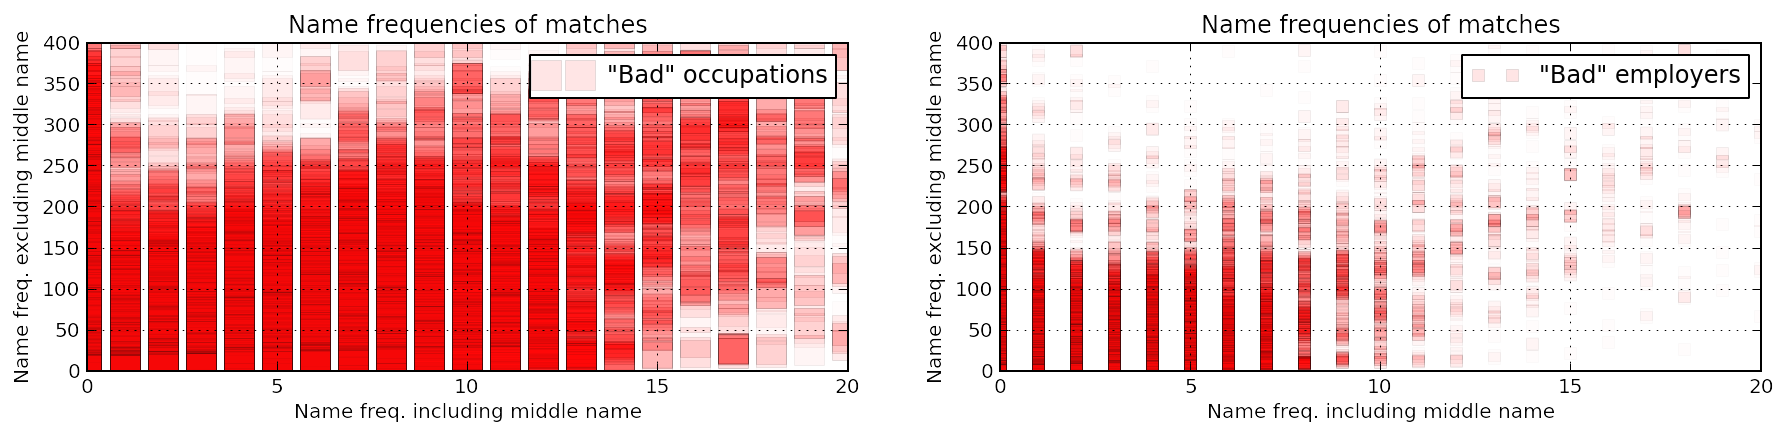

In [12]:
plt.rcParams['figure.figsize'] = 15, 10
alpha = 0.1


ax = plt.subplot(3,2,1)
plt.plot(f_o_2_middle,f_o_2,'sr', alpha = alpha, label='"Bad" occupations', ms=15)
plt.xlim([0,20])
plt.ylim([0,400])
plt.title('Name frequencies of matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend().get_frame().set_facecolor('white')
plt.grid()


ax = plt.subplot(3,2,2)
plt.plot(f_e_2_middle,f_e_2,'sr', alpha = alpha, label='"Bad" employers')
plt.xlim([0,20])
plt.ylim([0,400])
plt.title('Name frequencies of matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend().get_frame().set_facecolor('white')
plt.grid()


In [14]:
plt.rcParams['figure.figsize'] = 10,15
alpha = 0.01

mymarkersize1 = 12
mymarkersize2 = 17
mymarkersize3 = 12


ax = plt.subplot(3,2,1)
plt.plot(f_o_2_middle,f_o_2,'sr', alpha = alpha, label='"Bad" occupations', ms=mymarkersize1)
plt.xlim([0,20])
plt.ylim([0,400])
plt.title('Name frequencies of matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend().get_frame().set_facecolor('white')
plt.grid()


ax = plt.subplot(3,2,2)
plt.plot(f_e_2_middle,f_e_2,'sr', alpha = alpha, label='"Bad" employers', ms=mymarkersize1)
plt.xlim([0,20])
plt.ylim([0,400])
plt.title('Name frequencies of matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend().get_frame().set_facecolor('white')
plt.grid()


ax = plt.subplot(3,2,3)
plt.plot(f_o_3_middle,f_o_3,'sg', alpha = alpha, label='Linked occupations', ms=mymarkersize2)
plt.xlim([0,15])
plt.ylim([0,100])
plt.title('Name frequencies of matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend().get_frame().set_facecolor('white')
plt.grid()


ax = plt.subplot(3,2,4)
plt.plot(f_e_3_middle,f_e_3,'sg', alpha = alpha, label='Linked employers', ms=mymarkersize2)
plt.xlim([0,15])
plt.ylim([0,100])
plt.title('Name frequencies of matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend(markerscale = 1).get_frame().set_facecolor('white')
plt.grid()

ax = plt.subplot(3,2,5)
plt.plot(f_o_4_middle,f_o_4,'sb', alpha = alpha, label= 'Identical occupations', ms=mymarkersize3)
# plt.plot(f_o_3_middle,f_o_3,'sr', alpha = 0.1, label='Linked occupations')
plt.xlim([0,20])
plt.ylim([0,400])
plt.title('Name frequencies of matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend().get_frame().set_facecolor('white')
plt.grid()


ax = plt.subplot(3,2,6)
plt.plot(f_e_4_middle,f_e_4,'sb', alpha = alpha, label= 'Identical employers', ms=mymarkersize3)
# plt.plot(f_e_3_middle,f_e_3,'sr', alpha = 0.1, label='Linked employers')
plt.xlim([0,20])
plt.ylim([0,400])
plt.title('Name frequencies of matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend(markerscale = 1).get_frame().set_facecolor('white')
plt.grid()
plt.savefig('bootstrapping-match.pdf')
# plt.savefig('bootstrapping-match.png', dpi=150)


NameError: name 'plt' is not defined

In [13]:
print sum((f_e_4 >= f_e_4_middle) & (f_e_4 > -1) & (f_e_4_middle > -1))
print sum((f_e_4 < f_e_4_middle) & (f_e_4 > -1) & (f_e_4_middle > -1))
print

print sum((f_o_4 >= f_o_4_middle) & (f_o_4 > -1) & (f_o_4_middle > -1))
print sum((f_o_4 < f_o_4_middle) & (f_o_4 > -1) & (f_o_4_middle > -1))

488728
1729

440464
1590


## Gating 

In [167]:
def myformat(i):
    return str(i).ljust(20,' ')

# Gate linked employers
gate_o_3 = lambda x,y: (x < 10 ) and (y < 20) and (x > -1) and (y > -1 )
gate_e_3 = lambda x,y: (x < 9 ) and (y < 20) and (x > -1) and (y > -1 )

# gate_o_3 = lambda x,y: (x < 6 ) and (y < 25)
# gate_e_3 = lambda x,y: (x < 6 ) and (y < 25)

num_gated_o_3 = sum([1 for i, without_middle in enumerate(f_o_3) \
                     if gate_o_3(f_o_3_middle[i], without_middle)])
num_gated_no_3 = sum([1 for i, without_middle in enumerate(nf_o_3) \
                     if gate_o_3(nf_o_3_middle[i], without_middle)])
num_o_3 = sum(f_o_3 > -1)
print  myformat(float(num_gated_o_3) / num_o_3), "Percentage of matches with linked occupation captured by gate:"
print  myformat(num_gated_no_3 / float(num_gated_o_3)), "Ratio of non-matches to matches, with linked occupation, captured by gate"

print 
num_gated_e_3 = sum([1 for i, without_middle in enumerate(f_e_3) \
                     if gate_e_3(f_e_3_middle[i], without_middle)])
num_gated_ne_3 = sum([1 for i, without_middle in enumerate(nf_e_3) \
                     if gate_e_3(nf_e_3_middle[i],without_middle)])
num_e_3 = sum(f_e_3 > -1)
print myformat(float(num_gated_e_3) / num_e_3), "Percentage of matches with linked employers captured by gate:"
print myformat(num_gated_ne_3 / float(num_gated_e_3)), "Ratio of non-matches to matches, with linked employers, captured by gate"


0.86387587822        Percentage of matches with linked occupation captured by gate:
0.650288037953       Ratio of non-matches to matches, with linked occupation, captured by gate

0.87018469657        Percentage of matches with linked employers captured by gate:
0.267738023044       Ratio of non-matches to matches, with linked employers, captured by gate


8.0
12.0
1.0
1.0
34.0
29.0


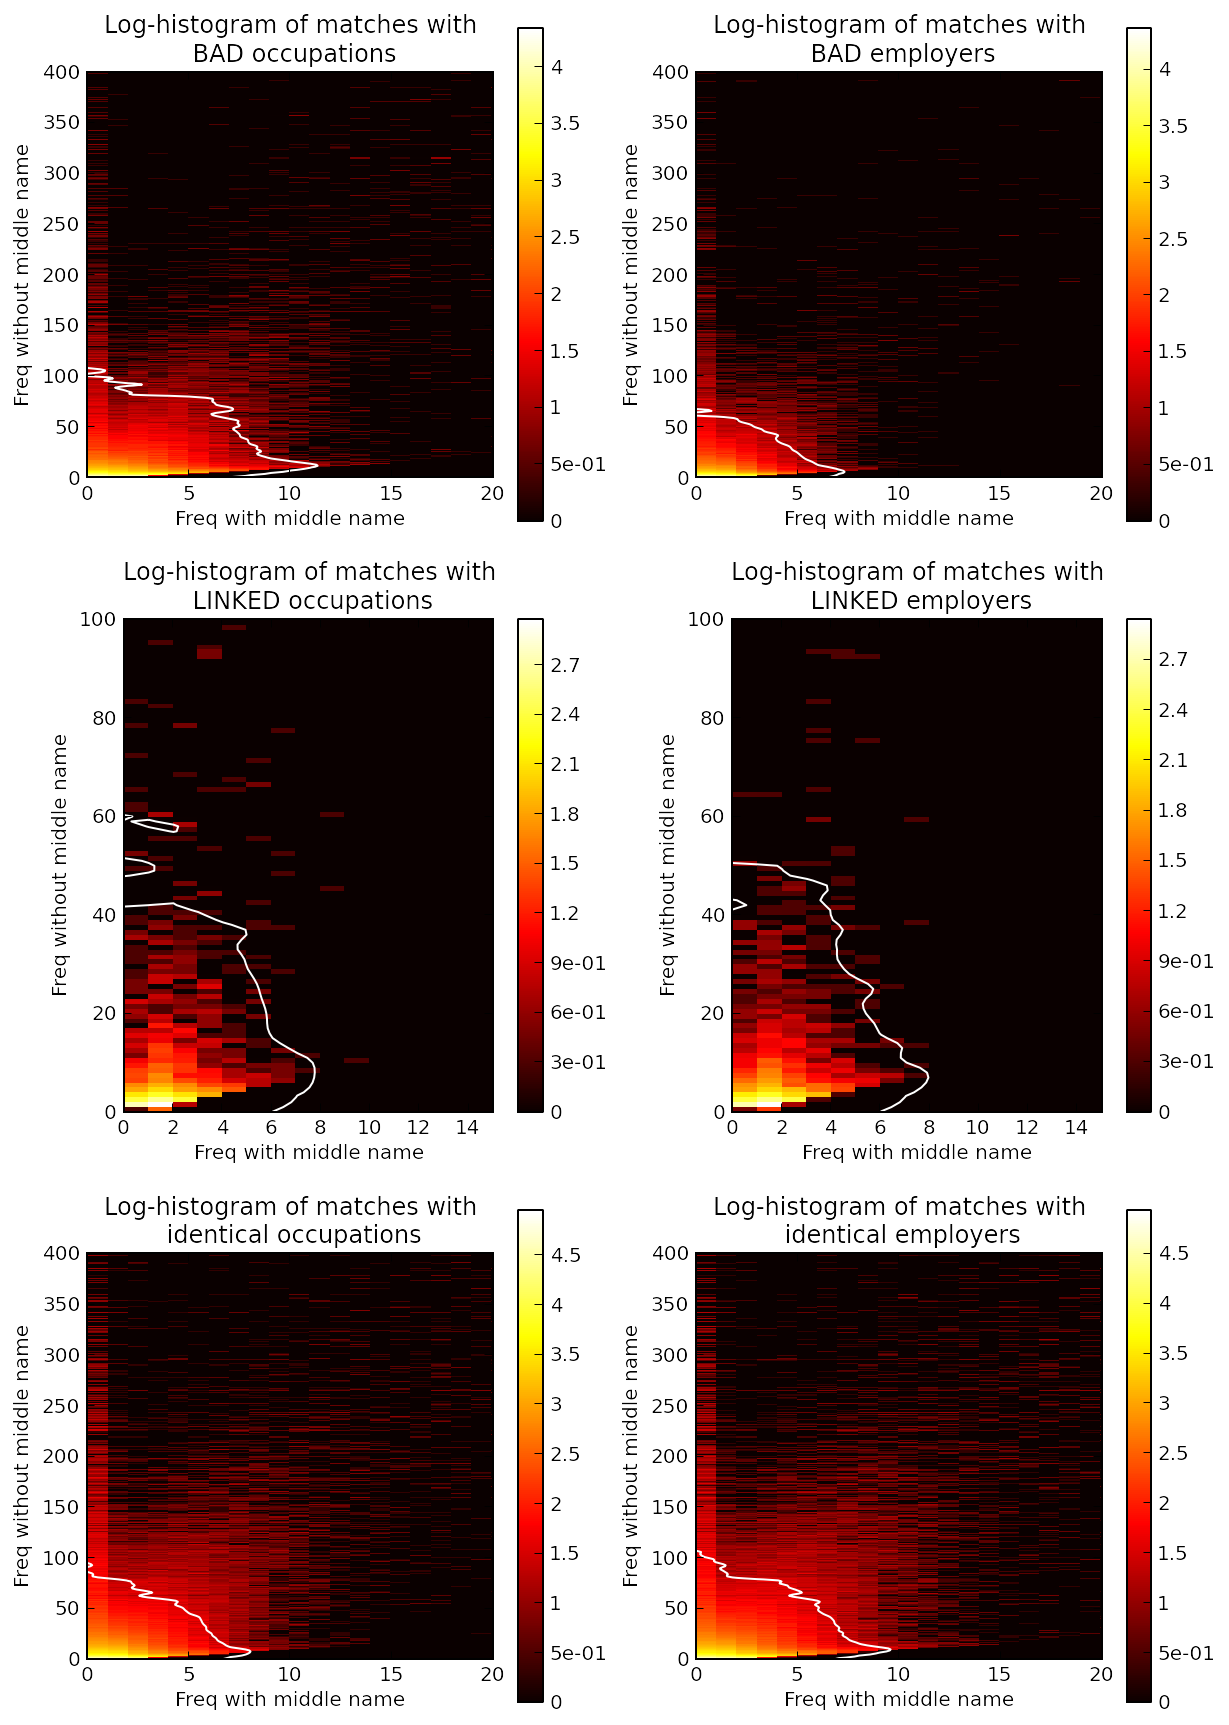

In [18]:

contour_colors = 'w'
cum_percent = 95
resolution = 250
bins = [np.arange(0,1200)-0.5, np.arange(0,100)-0.5]

# range1 = [[0,76],[0,200]]
def cum_threshold(myarray, percentile):
    '''
    For an array (possibly 2d), return the threshold
    value corresponding to the top percentile of the
    cumulative sum of the sorted array.
    In other words, the return value C{y} is such that
    all entries in C{myarray} with values above c{y} will
    add up to c{percentile} percent of the total sum of
    C{myarray}'s entries.
    '''
    freqs_sorted = sorted(myarray.flatten())
    x = np.cumsum(freqs_sorted)
    xmax = max(x)

    # index for 95 percentile of cumsum
    cutoff_index = np.where(x > xmax*(1-percentile/100.))[0][0]
    return freqs_sorted[cutoff_index]
def heatmap(xx, yy, title, subplot, aspect = 1, xlim = None, ylim = None):
    from scipy import ndimage
    plt.subplot(3,2,subplot)
    indices = np.where(~np.isnan(xx) & ~np.isnan(yy))[0]
    freqs, xe, ye = np.histogram2d( xx[indices], yy[indices], bins, normed = False)
    range1 = [0,max(ye), max(xe), 0]

    threshold = cum_threshold(freqs, cum_percent)
    filtered_indices = np.where(freqs > threshold)
    freqs_tmp = freqs + 1.0-1.0
    np.place(freqs_tmp, freqs == 0, 1)

    a = np.log10(freqs_tmp)
#     a[filtered_indices] = 0
    plt.imshow(a, cmap='hot', interpolation='none', extent = range1 )
    formatter = matplotlib.ticker.LogFormatter(10, labelOnlyBase=False) 

    colorbar = plt.colorbar(format = formatter,)

    # plt.gca().set_xticks([0,1])
    print threshold
    plt.gca().invert_yaxis()
    
    freqs = ndimage.gaussian_filter(freqs, sigma=(1.5, 1.5), order=0)
    plt.contour(np.flipud(freqs), colors=contour_colors, levels = [threshold],\
                extent = range1, antialiased = True, nchunk = 100 )

#     plt.gca().axis('tight') 
    plt.xlabel('Freq with middle name')
    plt.ylabel('Freq without middle name')
    plt.title(title)
    plt.gca().set_aspect(aspect)
    plt.xlim(xlim)
    plt.ylim(ylim)
    
heatmap(f_o_2, f_o_2_middle, 'Log-histogram of matches with \n BAD occupations', 1,\
        aspect = 0.05, xlim=(0,20), ylim=(0,400))
heatmap(f_e_2, f_e_2_middle, 'Log-histogram of matches with \n BAD employers', 2,\
        aspect = 0.05, xlim=(0,20), ylim=(0,400))

heatmap(f_o_3, f_o_3_middle, 'Log-histogram of matches with \n LINKED occupations', 3,\
        aspect = 0.2, xlim=(0,15), ylim=(0,100))
heatmap(f_e_3, f_e_3_middle, 'Log-histogram of matches with \n LINKED employers', 4,\
        aspect = 0.2, xlim=(0,15), ylim=(0,100))

heatmap(f_o_4, f_o_4_middle, 'Log-histogram of matches with \n identical occupations', 5,\
        aspect = 0.05, xlim=(0,20), ylim=(0,400))
heatmap(f_e_4, f_e_4_middle, 'Log-histogram of matches with \n identical employers', 6,\
        aspect = 0.05, xlim=(0,20), ylim=(0,400))



plt.savefig('matches-95pct.pdf')

5.0
5.0
1.0
1.0


(0, 20)

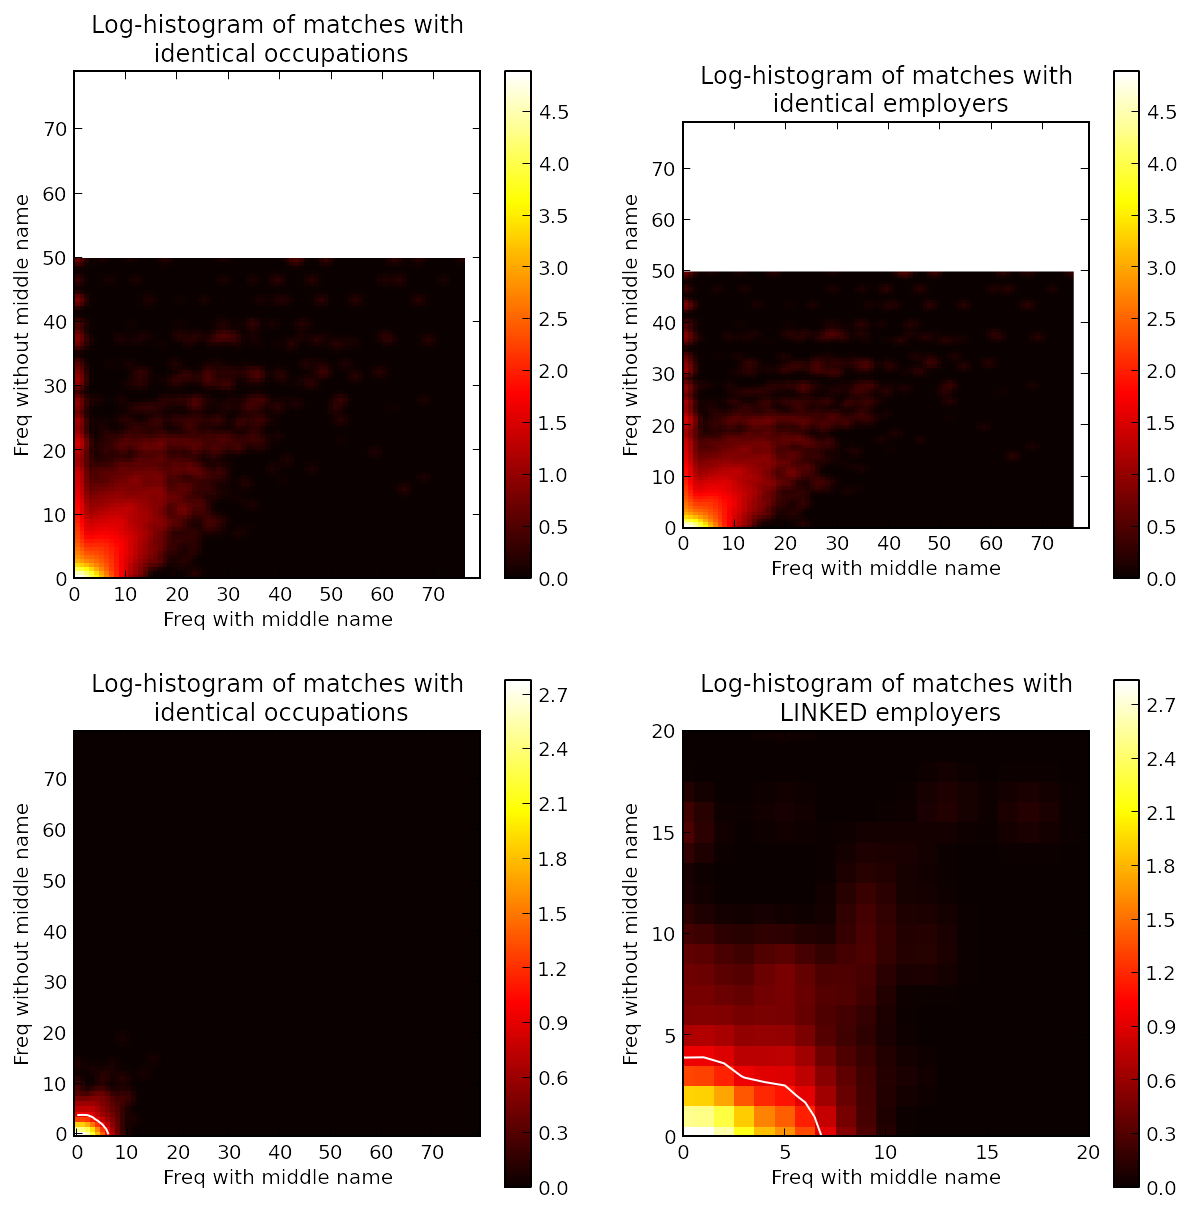

In [433]:
plt.rcParams['figure.figsize'] = 10,10

######################################################
## Identical affiliations
######################################################resolution = 80
contour_colors = 'w'
cum_percent = 98
# range1 = [[0,76],[0,200]]
range1 = [0,76,50,0]

plt.subplot(2,2,1)
indices = np.where(~np.isnan(f_o_4) & ~np.isnan(f_o_4_middle))[0]
freqs, xe, ye = np.histogram2d( f_o_4[indices], f_o_4_middle[indices], resolution, normed = False)
np.place(freqs, freqs == 0, 1)
threshold = cum_threshold(freqs, cum_percent)
freqs = ndimage.gaussian_filter(freqs, sigma=(1, 1), order=0)
a = np.log10(freqs)
plt.imshow(a, cmap='hot', interpolation='none', extent = range1)
plt.colorbar()
print threshold
plt.contour(a, colors=contour_colors, levels = [threshold])
plt.xlabel('Freq with middle name')
plt.ylabel('Freq without middle name')
plt.title('Log-histogram of matches with \n identical occupations')
plt.gca().invert_yaxis()
plt.gca().set_aspect('auto')




plt.subplot(2,2,2)
indices = np.where(~np.isnan(f_e_4) & ~np.isnan(f_e_4_middle))[0]
freqs, xe, ye  = np.histogram2d( f_e_4[indices], f_e_4_middle[indices], resolution, normed = False)
np.place(freqs, freqs == 0, 1)
threshold = cum_threshold(freqs, cum_percent)
freqs = ndimage.gaussian_filter(freqs, sigma=(1, 1), order=0)

a = np.log10(freqs)
plt.imshow(a, cmap='hot', interpolation='none', extent = range1)
plt.colorbar()
print threshold
plt.contour(a, colors=contour_colors, levels = [threshold])
plt.xlabel('Freq with middle name')
plt.ylabel('Freq without middle name')
plt.title('Log-histogram of matches with \n identical employers')
plt.gca().invert_yaxis()
# plt.gca().set_aspect(0.5)



######################################################
## Linked affiliations
######################################################

plt.subplot(2,2,3)
indices = np.where(~np.isnan(f_o_3) & ~np.isnan(f_o_3_middle))[0]
freqs = np.histogram2d( f_o_3[indices], f_o_3_middle[indices], resolution, normed = False)[0]
np.place(freqs, freqs == 0, 1)
threshold = cum_threshold(freqs, cum_percent)
freqs = ndimage.gaussian_filter(freqs, sigma=(1, 1), order=0)

a = np.log10(freqs)
plt.imshow(a, cmap='hot', interpolation='none')
plt.colorbar()
print threshold
plt.contour(a, colors=contour_colors, levels = [threshold])
plt.xlabel('Freq with middle name')
plt.ylabel('Freq without middle name')
plt.title('Log-histogram of matches with \n LINKED occupations')
plt.gca().invert_yaxis()



plt.subplot(2,2,4)
indices = np.where(~np.isnan(f_e_3) & ~np.isnan(f_e_3_middle))[0]
freqs = np.histogram2d( f_e_3[indices],f_e_3_middle[indices], resolution, normed = False)[0]
np.place(freqs, freqs == 0, 1)
threshold = cum_threshold(freqs, cum_percent)
freqs = ndimage.gaussian_filter(freqs, sigma=(1, 1), order=0)

a = np.log10(freqs)
plt.imshow(a, cmap='hot', interpolation='none')
plt.colorbar()
print threshold
plt.contour(a, colors=contour_colors, levels = [threshold])
plt.xlabel('Freq with middle name')
plt.ylabel('Freq without middle name')
plt.title('Log-histogram of matches with \n LINKED employers')
plt.gca().invert_yaxis()
plt.xlim([0,20])
plt.ylim([0,20])

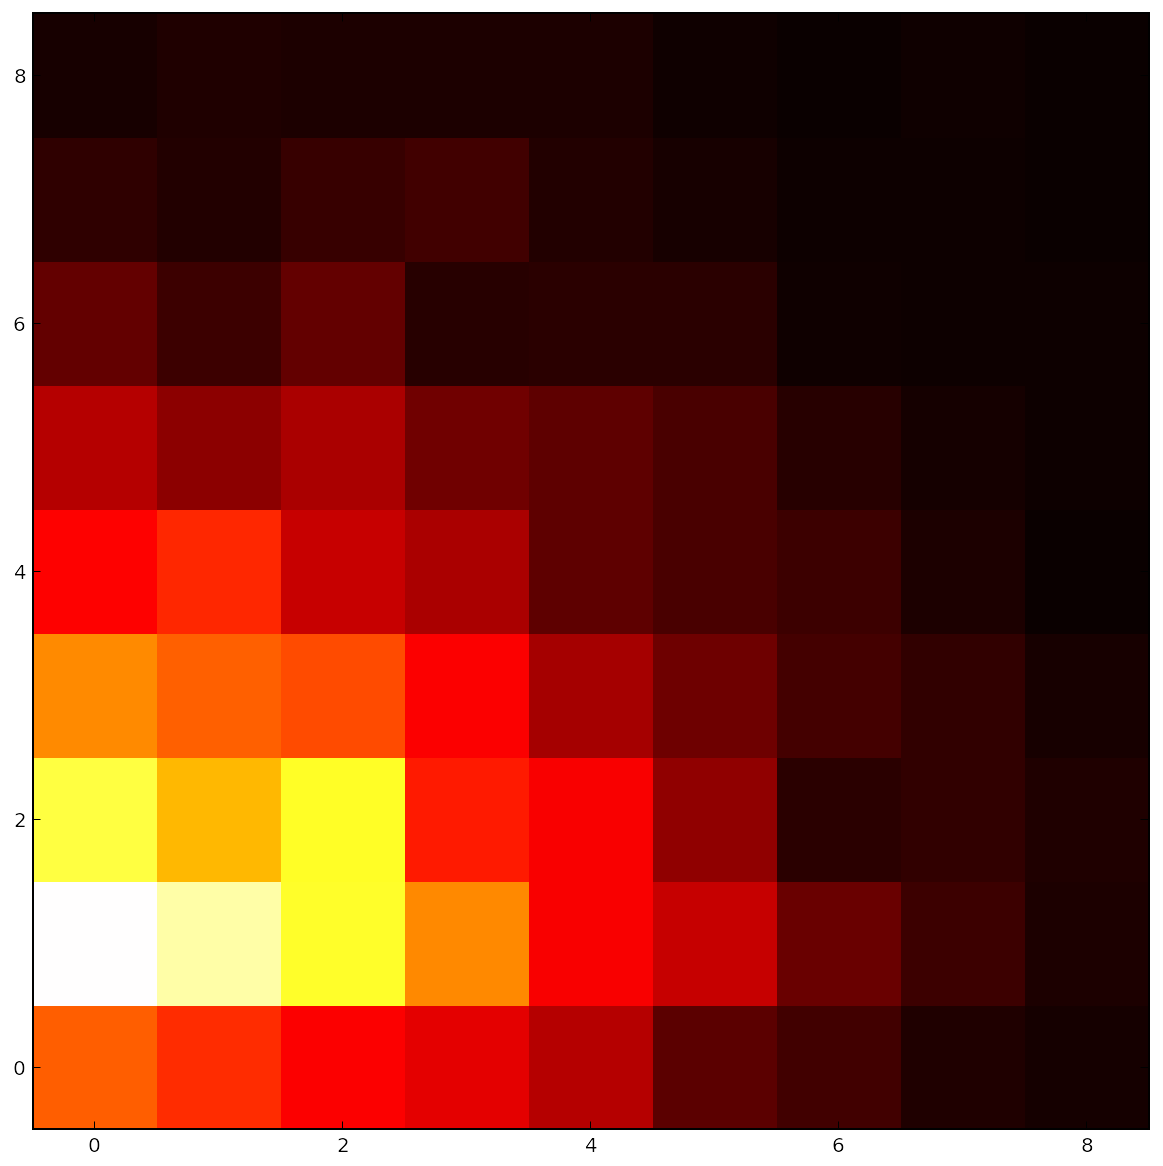

In [512]:
resolution = 10
x = np.random.normal(0,3,10000)
y = np.random.normal(0,3,10000)
indices = np.where(x > 0)
x=x[indices]
y=y[indices]
freqs, xe, ye = np.histogram2d(x,y, [np.arange(10)-0.5,np.arange(10)-0.5], normed = False)
plt.imshow(freqs, cmap='hot', interpolation='none')
plt.gca().invert_yaxis()



In [513]:
print xe

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


In [17]:

    
# cum_threshold(freqs1, 95)

# Non-matches 

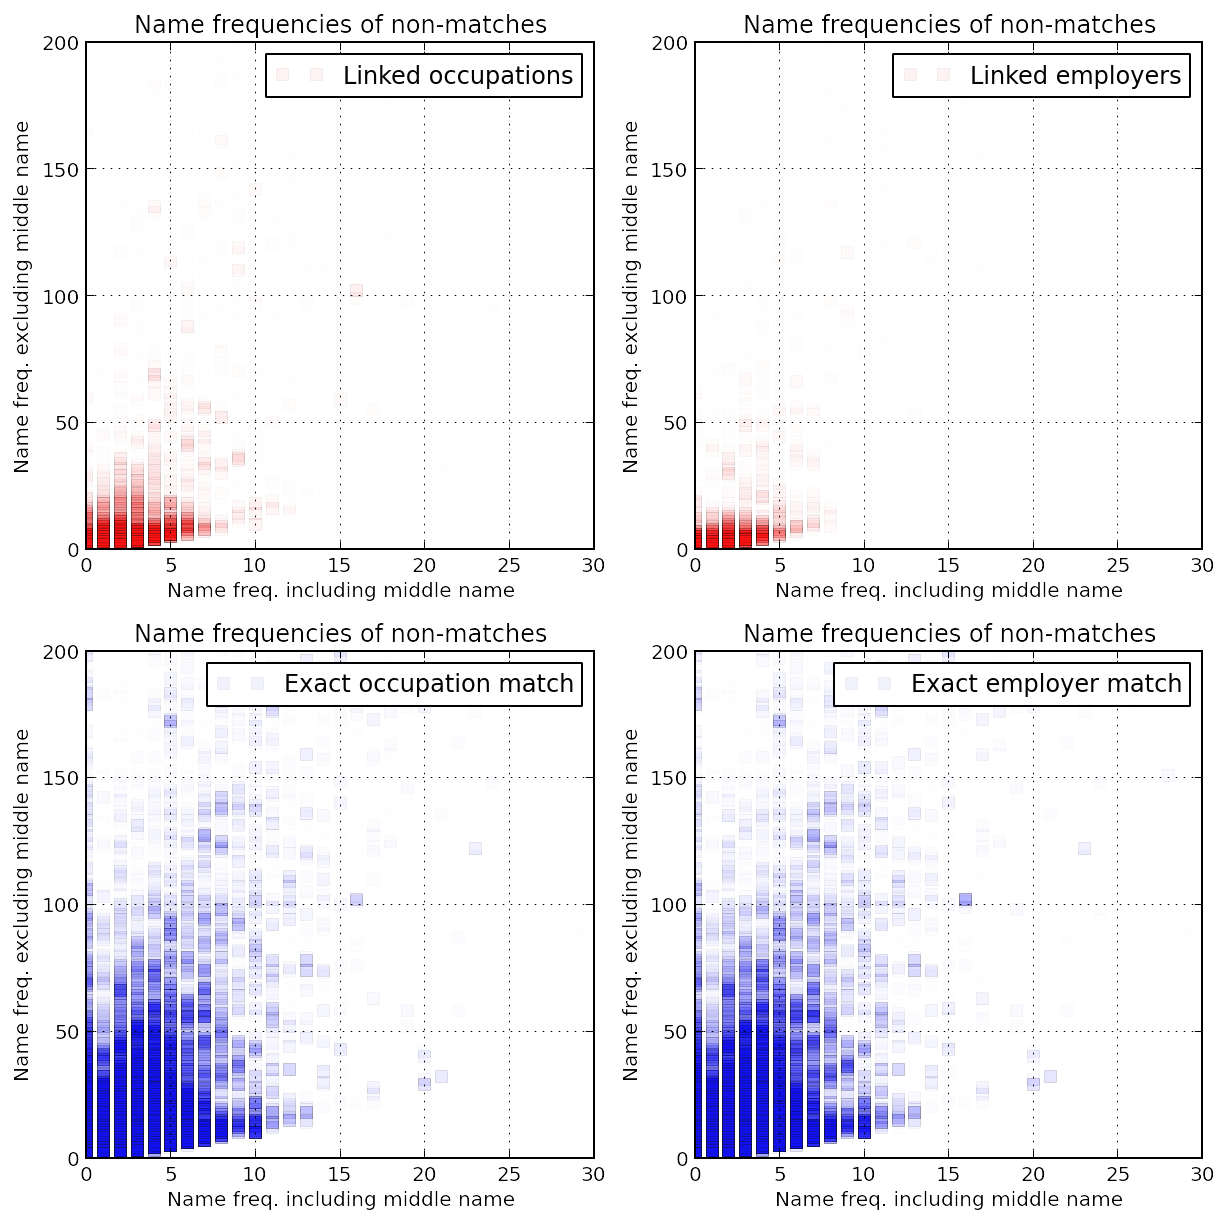

In [289]:
plt.rcParams['figure.figsize'] = 10, 10
alpha = 0.05


ax = plt.subplot(2,2,1)
# ax.set_aspect('equal')
# plt.plot(nf_o_4_middle,nf_o_4,'sb', alpha = 0.1, label= 'Exact occupation match')
plt.plot(nf_o_3_middle,nf_o_3,'sr', alpha =alpha , label='Linked occupations')
plt.xlim([0,30])
plt.ylim([0,200])
plt.title('Name frequencies of non-matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend().get_frame().set_facecolor('white')
plt.grid()


ax = plt.subplot(2,2,2)
# ax.set_aspect('equal')
# plt.plot(nf_e_4_middle,nf_e_4,'sb', alpha = 0.1, label= 'Exact employer match')
plt.plot(nf_e_3_middle,nf_e_3,'sr', alpha = alpha, label='Linked employers')
plt.xlim([0,30])
plt.ylim([0,200])
plt.title('Name frequencies of non-matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend(markerscale = 1).get_frame().set_facecolor('white')
plt.grid()


ax = plt.subplot(2,2,3)
# ax.set_aspect('equal')
plt.plot(nf_o_4_middle,nf_o_4,'sb', alpha = alpha, label= 'Exact occupation match')
# plt.plot(nf_o_3_middle,nf_o_3,'sr', alpha = 0.1, label='Linked occupations')
plt.xlim([0,30])
plt.ylim([0,200])
plt.title('Name frequencies of non-matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend().get_frame().set_facecolor('white')
plt.grid()


ax = plt.subplot(2,2,4)
# ax.set_aspect('equal')
plt.plot(nf_e_4_middle,nf_e_4,'sb', alpha = alpha, label= 'Exact employer match')
# plt.plot(nf_e_3_middle,nf_e_3,'sr', alpha = 0.1, label='Linked employers')
plt.xlim([0,30])
plt.ylim([0,200])
plt.title('Name frequencies of non-matches')
plt.xlabel('Name freq. including middle name')
plt.ylabel('Name freq. excluding middle name')
plt.legend(markerscale = 1).get_frame().set_facecolor('white')
plt.grid()

plt.savefig('bootstrapping-nonmatch.pdf')
plt.savefig('bootstrapping-nonmatch.png')


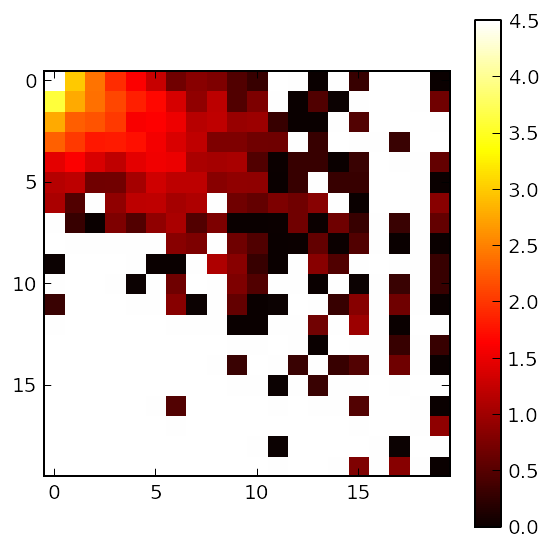

In [60]:
plt.rcParams['figure.figsize'] = 10,10
plt.subplot(2,2,1)
a = np.log10(np.histogram2d(nf_e_4,nf_e_4_middle, 20, normed = False)[0])
plt.imshow(a, cmap='hot', interpolation='none')
plt.colorbar()
plt.title('')

# Match to non-math ratio

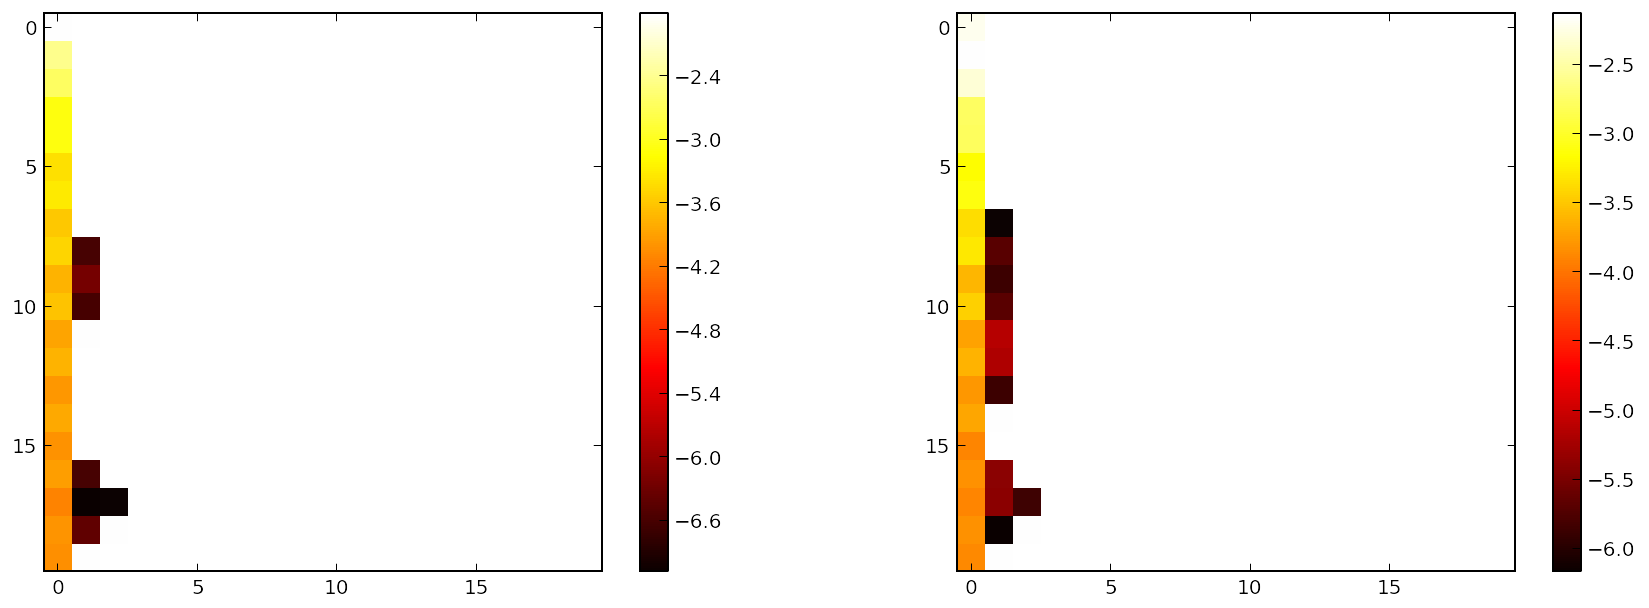

In [219]:
hist_range = [[0,50],[0,300]]
resolution = 20

f_e_4_cp = f_e_4.copy()
f_e_4_middle_cp = f_e_4_middle.copy()
f_e_4_cp[f_e_4 < 0] = 0
f_e_4_middle_cp[f_e_4_middle < 0] = 0

# This is silly, but necessary due to 
# an apparent numpy bug
f_e_4_cp = np.array(list(f_e_4_cp))
f_e_4_middle_cp = np.array(list(f_e_4_middle_cp))

nf_e_4_cp = nf_e_4.copy()
nf_e_4_middle_cp = nf_e_4_middle.copy()
nf_e_4_cp[nf_e_4 < 0] = 0
nf_e_4_middle_cp[nf_e_4_middle < 0] = 0

nf_e_4_cp = np.array(list(nf_e_4_cp))
nf_e_4_middle_cp = np.array(list(nf_e_4_middle_cp))

match = np.histogram2d(f_e_4_cp,f_e_4_middle_cp, resolution, range = hist_range, normed = True)[0]
nmatch = np.histogram2d(nf_e_4_cp,nf_e_4_middle_cp, resolution, range = hist_range, normed = True)[0]
match = np.log10(match)
nmatch = np.log10(nmatch)
plt.subplot(1,2,1)
plt.imshow(match  , cmap='hot', interpolation='none')
plt.colorbar()
plt.title('')

plt.subplot(1,2,2)
plt.imshow(nmatch  , cmap='hot', interpolation='none')
plt.colorbar()
plt.title('')


In [214]:
match = np.histogram2d(f_e_4_cp, f_e_4_middle_cp, resolution, normed = True)[0]


TypeError: array cannot be safely cast to required type

(array([272093,  49798,   6820,   6391,   1604,   2018,    685,    922,
           354,    527,    186,    400,    152,    211,     88,    188,
            54,    119,     55,     87,     35,     47,     30,     87,
            25,     36,     21,     10,     22,      9,     20,     16,
            11,     10,     21,      2,     12,      0,      8,      9,
            10,      5,      5,      0,     15,      5,      0,      3,
             0,      3]),
 array([  0.  ,   1.52,   3.04,   4.56,   6.08,   7.6 ,   9.12,  10.64,
         12.16,  13.68,  15.2 ,  16.72,  18.24,  19.76,  21.28,  22.8 ,
         24.32,  25.84,  27.36,  28.88,  30.4 ,  31.92,  33.44,  34.96,
         36.48,  38.  ,  39.52,  41.04,  42.56,  44.08,  45.6 ,  47.12,
         48.64,  50.16,  51.68,  53.2 ,  54.72,  56.24,  57.76,  59.28,
         60.8 ,  62.32,  63.84,  65.36,  66.88,  68.4 ,  69.92,  71.44,
         72.96,  74.48,  76.  ]),
 <a list of 50 Patch objects>)

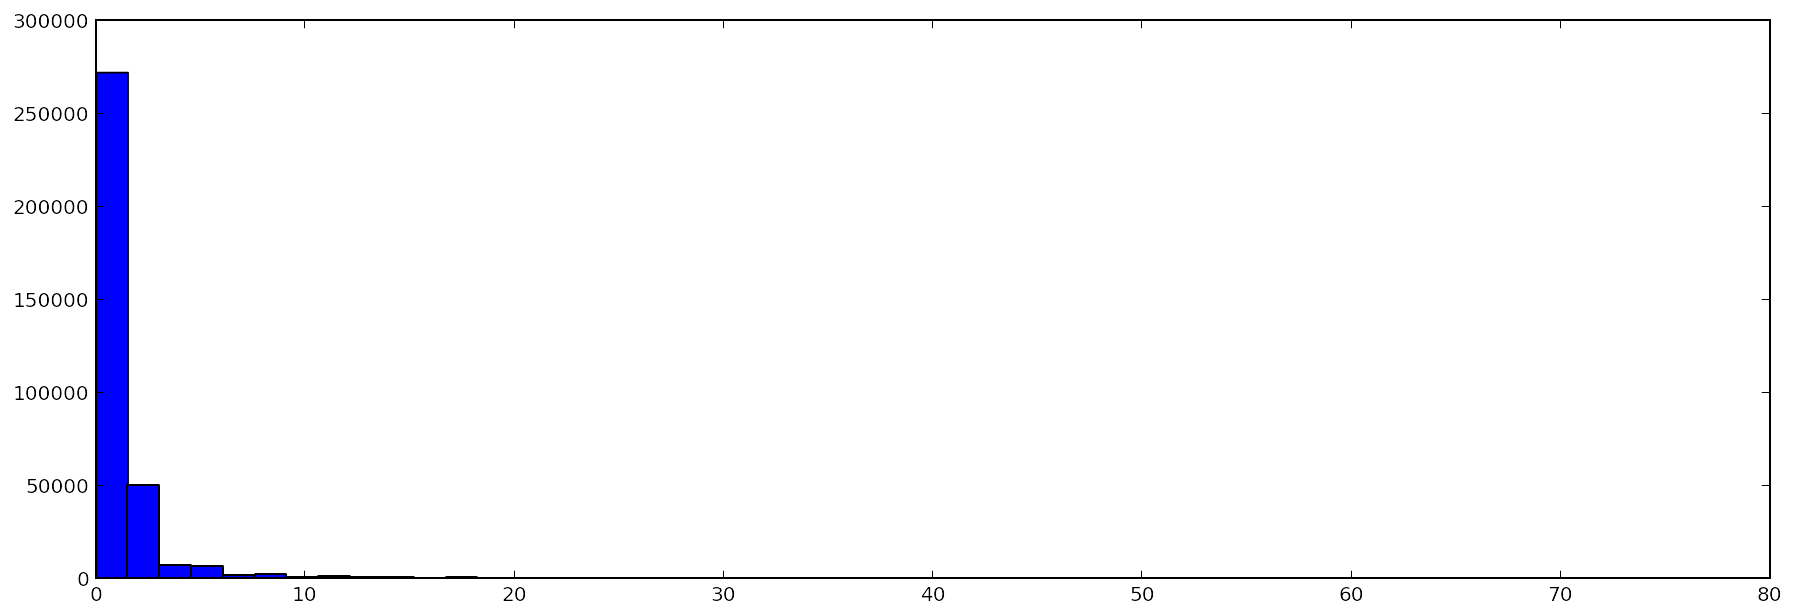

In [213]:
plt.hist(f_e_4_middle_cp, 50)

In [49]:
sum([1 for identity, list_ids in idm_split.dict_identity_2_list_ids.iteritems() if identity.count('|')> 0])
    

2837660

In [89]:
sizes = [len(list_ids) for identity, list_ids in idm_split.dict_identity_2_list_ids.iteritems() if identity.count('|')> 0]



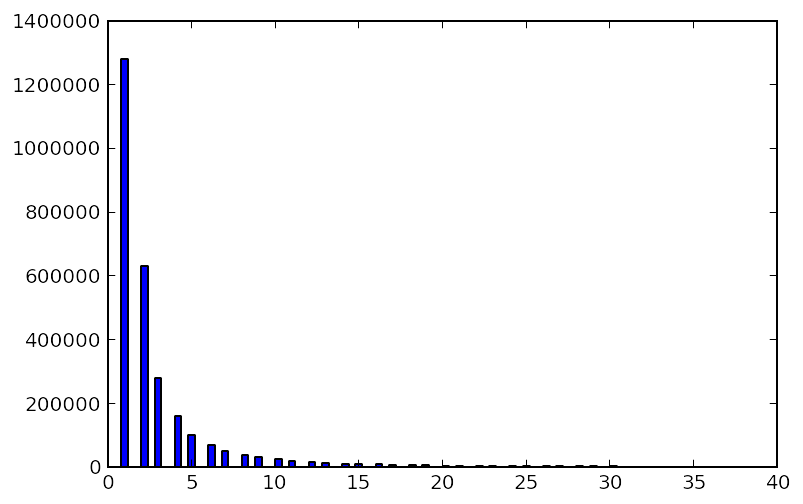

In [94]:
tmp = plt.hist(sizes,100, range = (0,40))

# Do partition_S1_identities here 

In [ ]:
from disambiguation.core import utils, Disambiguator, Project, Tokenizer
from disambiguation.core import hashes
import disambiguation.config as config
from disambiguation.core import Database
import cPickle

# Whether to split the identities afresh (!)
split_fresh = False

# Whether to recompute and partition 
# identity pairs to be compared.
partition_fresh = True

num_partitions = 20


# idm = Database.IdentityManager('USA')
# idm.fetch_dict_id_2_identity()
# idm.fetch_dict_identity_2_id()


if split_fresh:
    # The split version of dict_identity_2_list_ids
    dict_identity, dict_id = split_dict_identity_ids(idm.dict_identity_2_list_ids,0.5)
    with open('../dict_identity.pickle','w') as f:
        cPickle.dump(dict_identity, f)
    with open('../dict_id.pickle','w') as f:
        cPickle.dump(dict_id, f)
else:
    with open('../dict_identity.pickle') as f:
        dict_identity = cPickle.load(f)
    with open('../dict_id.pickle') as f:
        dict_id = cPickle.load(f)

# An idm loaded with the split dictionaries.
idm_split = Database.IdentityManager('USA')
idm_split.dict_identity_2_list_ids = dict_identity
idm_split.dict_id_2_identity = dict_id









# def partition_S1_identities(num_partitions, state = "USA", idm = None):

num_partitions = 10
state = "USA"
idm = idm_split
'''
Replacing L{partition_records}, this method uses the record edgelist
to identify which S1 "identities" are potential matches, and then partitions
the identities--rather than the records--into minimally overlapping sets.
The goal is to compare pairs of identities rather than records.
This method has 2 main outputs: 
1- C{config.candidate_S1_identity_pairs_partitioned_file_template} for each partition.
This file conains a list of pairs of S1 identities that must be compared.
2- C{config.candidate_list_records_partitioned_file_template} for each partition.
This file contains a list of record ids associated with any of the identities found
in the previous file.
'''
if not idm:
    # IdentityManager instance
    idm = Database.IdentityManager('USA')

# file that either already contains, or will contain a set of candidate
# pairs of record ids together with a "weight"
candidate_pairs_file = config.candidate_pairs_file_template % state


# Compile an edgelist of all S1 Identity pairs that must be compared
# according to the candidate record pairs.
# NOTE: does the order matter? record pairs are weighted...

if False:
    print "Generating list of identity pairs to be compared..."
    # This is a list of 3-tuples (rid1, rid2, weight)
    list_record_pairs = []
    with open(candidate_pairs_file) as f:
        for line in f:
            tmp = line.strip().split(" ")
            list_record_pairs.append((int(tmp[0]), int(tmp[1]), int(tmp[2])))
    list_identity_pairs = __get_list_identity_pairs(list_record_pairs, idm)
    print "Done."

    # Save the list of candidate identity pairs to 
    candidate_S1_identity_pairs_file = config.candidate_S1_identity_pairs_file_template % state
    with open(candidate_S1_identity_pairs_file, 'w') as f:
        for id1, id2 in list_identity_pairs:
            f.write("%s %s\n" % (id1, id2))
    print "List of identity pairs written to file."

# Divide the set of S1 identities into roughly equally sized components.
candidate_S1_identity_pairs_file = config.candidate_S1_identity_pairs_file_template % state
ig = utils.igraph
with open(candidate_S1_identity_pairs_file) as f:
    g = ig.Graph.Read_Ncol(f, names=True, weights="if_present", directed=False)


list_components = g.components().subgraphs()
print "List of identity pairs divided into partitions."

# partition the list of all connected components into a list of
# num_partition subsets such that the total number of nodes in each
# partition is roughly constant.
list_of_partitions = utils.partition_list_of_graphs(list_components, num_partitions)

In [38]:
len(list_of_partitions)

10

In [39]:
[len(x) for x in list_of_partitions]

[41049, 41048, 41048, 41033, 41049, 41049, 41049, 41049, 41049, 1]

In [42]:
list_of_partitions[0][0].vcount()

127

In [ ]:
# Export the identity edgelist for each partition to a separate file.
# This is an edgelist between S1 identities
print "Saving identity pair partitions to separate files..."
list_of_list_edges = [ [(g.vs[e.source]['name'], g.vs[e.target]['name']) for g in partition for e in g.es] for partition in list_of_partitions]
for counter, partition in enumerate(list_of_list_edges):
    with open(config.candidate_S1_identity_pairs_partitioned_file_template % (state, counter), 'w') as f:
        for edge in partition:
            f.write("%s %s\n" % edge)
print "Done."


# For each partition, export a list of all record ids necessary
# for processing that partition. These are all record ids associated
# with any of the identities in the partition.
for counter, partition in enumerate(list_of_list_edges):
    set_record_ids = set()
    for edge in partition:
        identity1, identity2 = edge
        set_record_ids.update(set(idm.get_ids(identity1)))
        set_record_ids.update(set(idm.get_ids(identity2)))

    with open(config.candidate_list_records_partitioned_file_template % (state, counter), 'w') as f:
        for r_id in set_record_ids:
            f.write('%d\n' % r_id)

# Check candidate identity pairs

In [101]:
counter = 0
list_found_identities = []
from disambiguation import config
candidate_S1_identity_pairs_file = config.candidate_S1_identity_pairs_file_template % state
with open(candidate_S1_identity_pairs_file) as f:
    for line in f:
        identity1,identity2= line.strip().split(' ')
#         print identity1, identity2
        match1 = re.findall(r'(.*)\|([12])', identity1)
        match2 = re.findall(r'(.*)\|([12])', identity2)
        if match1 and match2:
            if match1[0][0] == match2[0][0]:
                if match1[0][1] != match2[0][1]:
                    counter += 1
                    list_found_identities.append(identity1)
#             if match1[0][0] == identity2 or match2[0][0] == identity1:
#                 counter += 1
print counter

841863


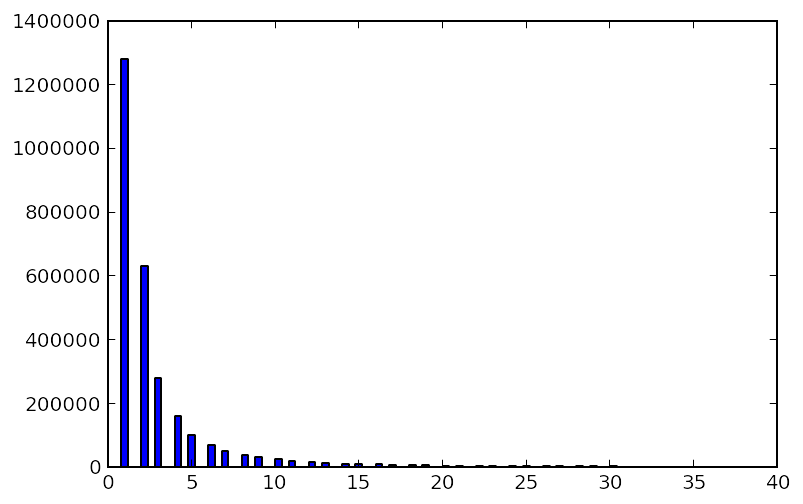

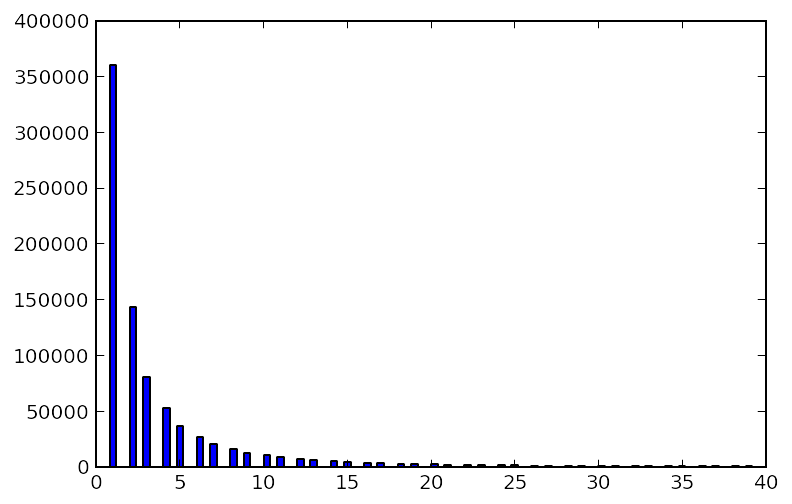

In [102]:
sizes_found = [len(idm_split.dict_identity_2_list_ids[identity]) for identity in list_found_identities ]
tmp = plt.hist(sizes,100, range = (0,40))
plt.figure()
tmp = plt.hist(sizes_found,100, range = (0,40))

In [104]:
import time

time.sleep(10)

In [12]:

# from stage2 import VerdictAuthority
v = VerdictAuthority()

NameError: name 'VerdictAuthority' is not defined

In [11]:

# v.verdict([(3, (2, 5)), (4, None), (4, None)])

In [691]:
(2,5) in v.inds_o_4

True

In [694]:
from disambiguation.core import Database

In [701]:
idm = Database.IdentityManager('USA')
idm.fetch_dict_identity_adjacency()
idm.fetch_dict_id_2_identity()
idm.fetch_dict_identity_2_id()

Table 'identities_v3' exists.
Table 'identities_adjacency_v3' exists.
SELECT identity1,identity2, verdict from identities_adjacency_v3;
select id,identity from identities_v3;
select id,identity from identities_v3;


In [699]:
idm.export_related_identities_csv()
idm.export_linked_identities_csv()

In [10]:
# idm.dict_id_2_identity

# Load normalized tokendata    

In [16]:
from disambiguation import config
normalized_tokendata_file = config.tokendata_file_template % ("USA", "Normalized")
with open(normalized_tokendata_file) as f:
    tokendata_usa = utils.cPickle.load(f)


In [20]:
t = tokendata_usa

In [24]:
fullname_with_middlename = 'KEELTY|S|JOSEPH'
fullname_without_middlename = 'KEELTY||JOSEPH'
freq_with_middlename = t.get_token_frequency((t.token_identifiers['N_full_name'][0], fullname_with_middlename))
freq_without_middlename = t.get_token_frequency((t.token_identifiers['N_full_name'][0], fullname_without_middlename))
print freq_with_middlename, freq_without_middlename

4 5


In [7]:

idm.get_linked_identities('MD-86797')
idm.get_linked_identities('DC-64650')

['DC-64650']

# Compare two specific records 

In [6]:
normalized_tokendata_file = config.tokendata_file_template % ("USA", "Normalized")
with open(normalized_tokendata_file) as f:
    tokendata_usa = utils.cPickle.load(f)



In [189]:
list_id = range(1300000)

retriever = Database.FecRetrieverByID(config.MySQL_table_usa_combined)
retriever.retrieve(list_id)


inserting...
done.
Done in 28.462611 seconds
SELECT NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id FROM usa_combined_v2 JOIN tmp_Pvb5LMxRq2dvX9sLvh2I USING (id) ;


/nfs/home/navid/src/FEC-1/src/disambiguation/core/Database.py:53: Warning: Unknown table 'tmp_Pvb5LMxRq2dvX9sLvh2I'
  cur.execute(query)


KeyboardInterrupt: 

In [12]:
rs = retriever.getRecords()

In [13]:
tokenizer = Tokenizer.Tokenizer()
tokenizer.setRecords(rs)
tokenizer.setTokenizedFields(list_tokenized_fields = ['NAME', 'ZIP_CODE', 'CONTRIBUTOR_STREET_1', 'CITY', 'STATE', 'EMPLOYER', 'OCCUPATION'])
tokenizer.tokenize(export_tokendata=False,export_vectors=False,export_normalized_attributes=False)
tokenizer.tokendata = tokendata_usa

Total number of tokens identified:  18


In [14]:
rs = tokenizer.getRecords()

In [15]:
r1,r2 = rs
print r1.toString()
print r2.toString()

ANDERSON, RHONDA L MRS	92253	LA QUINTA	CA	CREATIVE MEMORIES	CO FOUNDER
ANDERSON, RHONDA R MR.	75034	FRISCO	TX	SOCCER MOM	SOCCER MOM


In [16]:
print r1.compare_names(r1,r2)
print r1.compare_employers(r1,r2)
print r1.compare_occupations(r1,r2)
x

(-1000, None)
(0, None)
(0, None)


NameError: name 'x' is not defined

# VerdictAuthority 

# Affiliation graphs 

In [5]:
# Load affiliation networks
percent_occupations = config.percent_occupations_S2
percent_employers = config.percent_employers_S2

G_employer = utils.loadAffiliationNetwork('USA' , 'employer', percent=percent_employers)
G_occupation = utils.loadAffiliationNetwork('USA' , 'occupation', percent=percent_occupations)

if not G_occupation:
    print "OCCUPATION network not found."
    
if not G_employer:
    print "EMPLOYER network not found."


/nfs/home/navid/data/FEC-v5/affiliations/employer/USA-employer_graph.gml
/nfs/home/navid/data/FEC-v5/affiliations/occupation/USA-occupation_graph.gml


# Person retriever

In [7]:
# Requires idm, tokendata_usa]
    
    

def get_Person(identity, idm, tokendata_usa):
    list_ids = idm.get_ids(identity)
#     print list_ids
    retriever = Database.FecRetrieverByID(config.MySQL_table_usa_combined)
    retriever.retrieve(list_ids)
    rs = retriever.getRecords()

    tokenizer = Tokenizer.Tokenizer()
    tokenizer.setRecords(rs)
    tokenizer.setTokenizedFields(list_tokenized_fields = ['NAME', 'ZIP_CODE', 'CONTRIBUTOR_STREET_1', 'CITY', 'STATE', 'EMPLOYER', 'OCCUPATION'])
    tokenizer.tokenize(export_tokendata=False,export_vectors=False,export_normalized_attributes=False)
    tokenizer.tokendata = tokendata_usa
    list_of_records = tokenizer.getRecords()
    for r in list_of_records:
        r.tokendata = tokendata_usa
    if G_employer:
        for record in list_of_records:
            record.list_G_employer = [G_employer]
    if G_occupation:
        for record in list_of_records:
            record.list_G_occupation = [G_occupation]

    p = Person.Person(list_of_records)
    p.identity = identity
    return p, list_of_records

# identities = ['MD-86797', 'DC-64650']
# identities = ['TX-63656','TX-63658']
identities = ['OH-174725','TX-426204']
identities = ['NC-92122','NC-92121']
identities = ['CO-67142','CO-67082']
identities = ['NY-240347','NY-237892']
identities = ['MA-63813','NJ-68944']
identities = ['NM-15222','NM-15223']
# identities = ['TN-69044','NY-299022']
identities = ['FL-322380', 'FL-322377']
identities = ['WA-16437','WA-16432']
identities = ['GA-152167','GA-152165']
identities = ['IA-18404','IA-18398']
identities = ['NM-20699', 'NM-20704']
identities = ['CA-446322','NJ-125237']
identities = ['CA-18598','FL-9330']
identities = ['PA-49037','PA-49036']
p1, list_of_records1 = get_Person(identities[0], idm, tokendata_usa)
p2, list_of_records2 = get_Person(identities[1], idm, tokendata_usa)
# print p1.toString()
# print p2.toString()
result = p2.compare(p1, verbose = True)
print result



dict_identity_2_list_ids not loaded. Loading now...
select id,identity from identities_v5;
SELECT NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id FROM usa_combined_v2 WHERE id in (105528,155367,384587,1022614,1054936,1213613,1346311,1697520,1844475,2634330,3335242,3335864,3556411,3815803,4371031,4608617,4681452,4775170,5068829,5390251,5478060,5869963,8895707,9223976,9356702,9610206,10178206,10603817,10856615,10863805,10972447,11254882,11314745,11338183,11462564,11533925,11575223,11681767,11739152,11885200,12077254,12217168,12707966,12823877,13231625,13310602,13390689,13742532,13841099,13988843,14122956,14254369,14356447,14477077,14767569,15130685,15130768,15302178,15490434,15604840,15948790,15966088,15979390,16149648,16715509,16778723,16846157,17007884,17036418,17072059,17172968,17587949,17714493,17720742,17871891,18053657,18060483,18765944,18769257,19825157,20026999,20166240,20267289,20322735,20421337,20439613,20682

In [12]:
for r1 in p1.set_of_records:
    for r2 in p2.set_of_records:
        result = r1.compare_names(r1,r2)
        if result[0] > 0:
            print r1['NAME'], r2['NAME'], result

DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS A. (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS  MR. (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS MR. (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DE BENEDICTIS, NICHOLAS  MR. (2, (0, 0))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS A. (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS NICHOLAS (3, ('NA', 7))
DEBENEDICTIS, NICHOLAS DEBENEDICTIS, NICHOLAS (3, ('NA', 7))
DEBENEDI

In [10]:
print p1.get_dominant_attribute('N_middle_name')
print p2.get_dominant_attribute('N_middle_name')

print p1.get_dominant_attribute('N_first_name')
print p2.get_dominant_attribute('N_first_name')

# print p1.get_dominant_attribute('N_middle_name')
# print p2.get_dominant_attribute('N_middle_name')
results_name = [r1.compare_names(r1,r2) for r1 in p1.set_of_records for r2 in p2.set_of_records]
# print results_name


A
A
THOMAS
NICHOLAS


In [24]:
print idm.get_related_identities('CA-446322')
print idm.get_related_identities('NJ-125237')
# idm.get_linked_identities('NJ-125237')


{u'MN-53455': 1L, u'NJ-125237': -1L, u'MI-94290': 1L}
{u'MN-53455': 1L, u'MI-94290': 1L, u'CA-446322': -1L}


In [8]:
name = 'SIMPSON, JR., MURRAY S.'
names = ['DIANATI, K NAVID MR. ASDFASFD A'
        'SIMPSON, JR., MURRAY S.',
         'SIMPSON, MURRAY S. MR. JR',
        'THARP, JOHN J JR',
        'THARP, JOHN S. MR.',
        'WALSH, EDWYNA S MRS',
        'HUNT, STACY G. MR.',
        'SINGLETON, JAMES L MR.',
        'SINGLETON, JAMES LYNN',
        'NOBLE, CHARLES J. MR. III',
        'NOBLE, CHARLES H. MRS. JR',
        'TARDY, ROBERT J. JR.',
        'TARDY, J A']
for name in names:
#     print name
    print utils.splitname(name)
    print "-"*30


# lastname, s_right = re.findall(r'([^\,]*),(.*)',name)[0]
# print lastname
# print  s_right

('DIANATI', 'K', 'ASDFASFD')
------------------------------
('SIMPSON', 'S', 'MURRAY')
------------------------------
('THARP', 'J', 'JOHN')
------------------------------
('THARP', 'S', 'JOHN')
------------------------------
('WALSH', 'S', 'EDWYNA')
------------------------------
('HUNT', 'G', 'STACY')
------------------------------
('SINGLETON', 'L', 'JAMES')
------------------------------
('SINGLETON', 'LYNN', 'JAMES')
------------------------------
('NOBLE', 'J', 'CHARLES')
------------------------------
('NOBLE', 'H', 'CHARLES')
------------------------------
('TARDY', 'J', 'ROBERT')
------------------------------
('TARDY', 'J', 'A')
------------------------------


In [44]:
p,tmp = get_Person('MA-189840', idm, tokendata_usa)
print p.toString()

SELECT NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id FROM usa_combined_v2 WHERE id in (16893910) ;
Done in 0.000646 seconds
Total number of tokens identified:  11
TSOURIANIS, DIMITRA A	TSOURIANIS	LETTER SENT	INFORMATION REQUEST	02145	SOMERVILLE	MA	



In [11]:

print result
print verdict_authority.verdict(result)

False


NameError: name 'verdict_authority' is not defined

In [28]:
print len(p1.set_of_records)
print len(p2.set_of_records)

68
1


In [17]:
# idm.get_ids('OH-174725')
idm.dict_identity_adjacency['NC-92122']
idm.dict_identity_2_identities['NC-92122']

KeyError: 'NC-92122'

In [9]:
import cPickle
with open (config.normalized_attributes_file_template %'USA') as f:
    attrs = cPickle.loabd(f)

In [13]:
attrs[2258624]

{'N_address': [],
 'N_employer': 'RETIRED',
 'N_first_name': u'B  ASSELSTINE',
 'N_last_name': u'GORDON',
 'N_middle_name': '',
 'N_occupation': None,
 'N_zipcode': []}

# Compare vectors 

In [24]:
with open(config.vectors_file_template % ('USA', 'Tokenizer')) as f:
     v = cPickle.load(f)
    

In [28]:
normalized_tokendata_file = config.tokendata_file_template % ("USA", "Tokenizer")
with open(normalized_tokendata_file) as f:
    tokendata = utils.cPickle.load(f)


In [30]:
for x,y in v[11071683].iteritems():
    print tokendata.index_2_token[x]

(67, 'SELF-EMPLOYED')
(3, u'W')
(67, 'REQUESTED')
(2, u'CHARLES')
(1, u'LEDFORD')


# Run bootstrapping 

In [2]:
import stage2


31.0
26.0
1.0
1.0
25.0
33.0


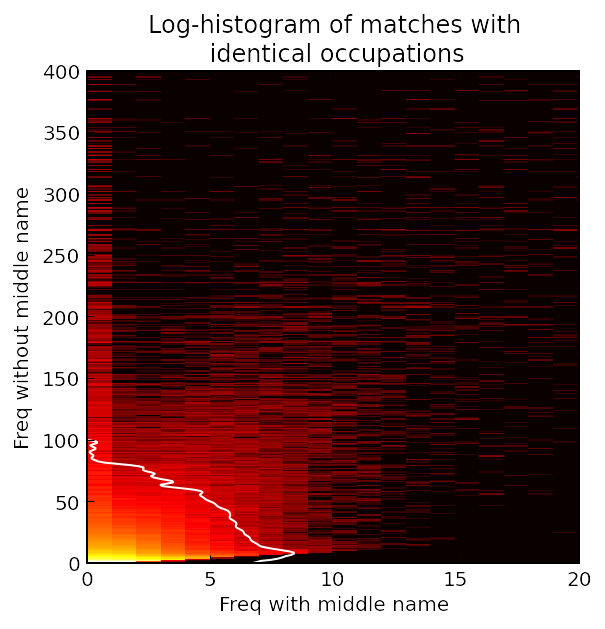

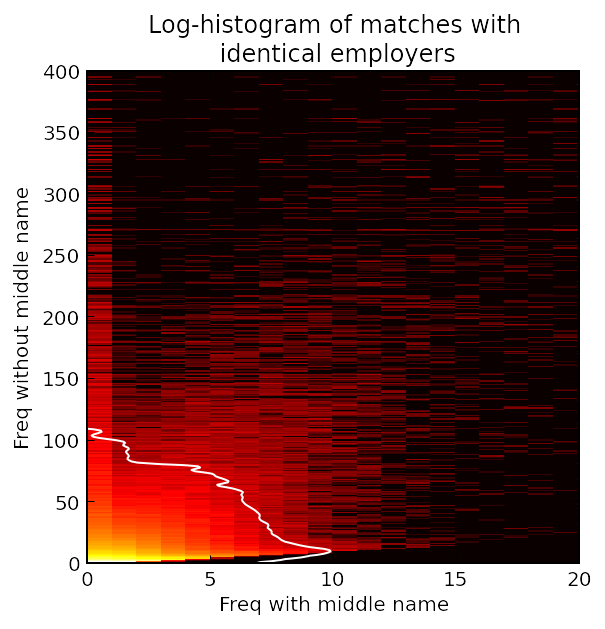

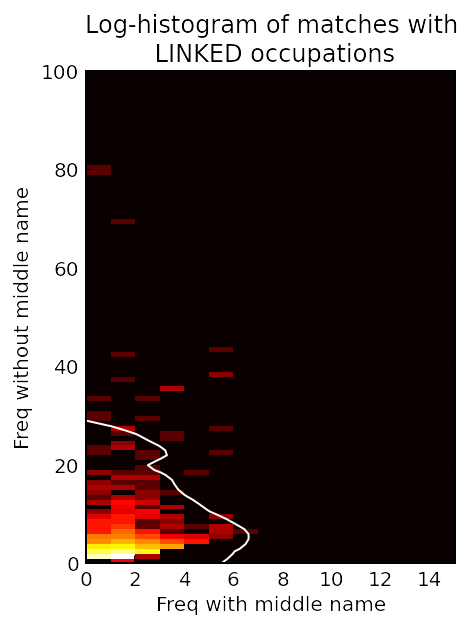

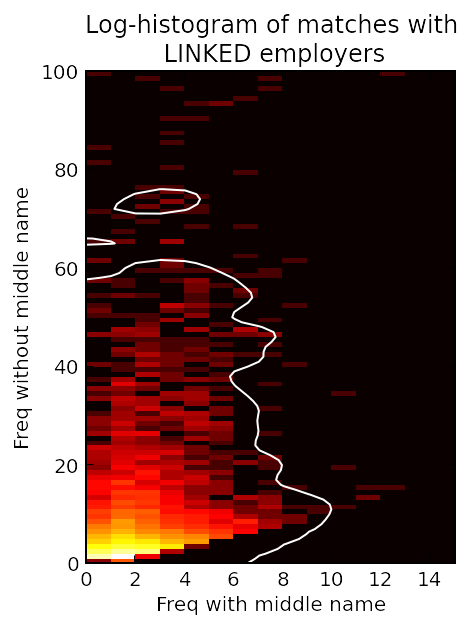

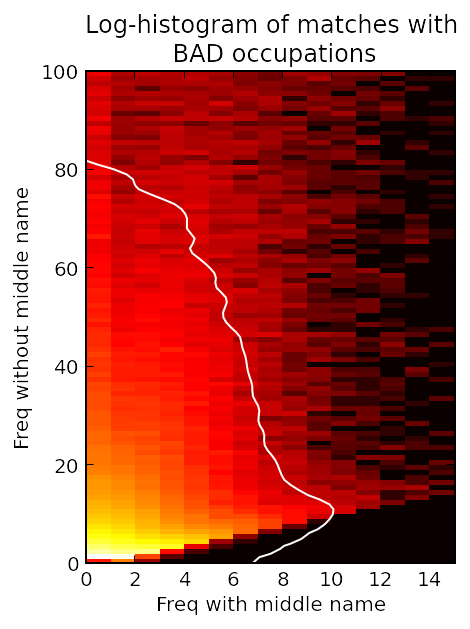

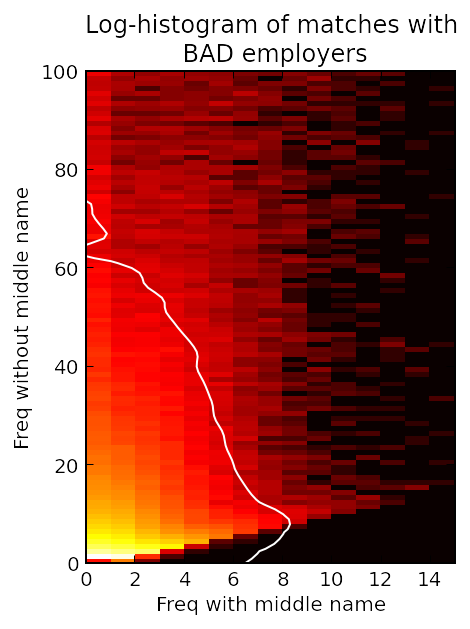

In [3]:
stage2.bootstrap_stageII()

In [26]:
a = -10
b = False

if a: print "yes"
print a > 0, b > 0


yes
False False


In [27]:
from disambiguation.core import utils

In [48]:
e1 = 'ALVARADO & . BENNETT and '
e2 = 'ALVARADO, GERKIN & BENNETT of'

# e1 = 'CT ANESTHESIA/ANESTHESIOLOGIST'
# e2 = 'CARDIOTHORACIC ANESTHESIA'
utils.__match_token_permuted(e1,e2, verbose = True)

set(['BENNETT', 'ALVARADO'])
set(['GERKIN', 'BENNETT', 'ALVARADO'])


True

In [43]:
s1.intersection(s2)

{'ALVARADO', 'BENNETT'}

In [57]:
import csv

In [58]:
import pandas as pd

In [62]:
data = pd.read_csv('/nfs/home/navid/data/FEC/voter_registration/voterfile_sample100k_20150624.csv',dtype=str)

In [63]:
data.columns

Index([u'personid', u'state_code', u'first_name', u'last_name', u'birth_date', u'sex', u'ethnicity_code', u'ethnicity_subgroup', u'ethnicity_source', u'phone_number', u'phone_type', u'media_market_name', u'media_market_id', u'us_house_district', u'reg_address_street1', u'reg_address_street2', u'reg_address_city', u'reg_address_state', u'reg_address_zip5', u'reg_address_zip4', u'reg_address_countyfips', u'reg_address_lat', u'reg_address_long', u'mailing_address_street1', u'mailing_address_street2', u'mailing_address_city', u'mailing_address_state', u'mailing_address_zip5', u'mailing_address_zip4', u'mailing_address_countyfips', u'mailing_address_lat', u'mailing_address_long', u'earliest_reg_date', u'reg_party_dem', u'reg_party_rep', u'reg_party_oth', u'reg_party_lib', u'reg_party_grn', u'reg_party_ind', u'reg_party_na', u'turnout_2014', u'turnout_2012', u'turnout_2010', u'turnout_2008', u'flags_online', u'flags_facebook_user', u'flags_aol_user', u'flags_catholic', u'flags_jewish', u'fla

In [67]:
x = set(data['personid'].tolist())


# Drop all tmp_ tables 

In [185]:
db = Database.DatabaseManager()
results = db.runQuery("SELECT * FROM information_schema.tables WHERE TABLE_NAME like 'tmp_%';")
[x[2] for x in results]

[u'tmp_1ibFT8hVZRHr2CPAsxkT',
 u'tmp_20E9x45i34pfAnaW4CoG',
 u'tmp_2TdjBtDjlo5v0pOZbYLD',
 u'tmp_3LnhcLWqTISa8OWMDAP5',
 u'tmp_3mIezqf6a1lMYGPGe6Al',
 u'tmp_4C6EFMNzWvksY9t1RpTQ',
 u'tmp_5NiIhEgjIkhNBLkXkttJ',
 u'tmp_5WDxTf03Ci99q6dmhEVO',
 u'tmp_5dIQNIqXL2wDAJ6vqMw2',
 u'tmp_5dqklnemrJVo47IsgkpK',
 u'tmp_5uAQT6JAUgvJXxq07tdf',
 u'tmp_65fOuQ5604eC9kl2aJK1',
 u'tmp_6PFX7UQeV9SMghIKAd3R',
 u'tmp_72qigJwgQfX5x8dTaRDz',
 u'tmp_81X2ejIiAseJeejUiTTx',
 u'tmp_8S64g63J6RFeCJG1Id4i',
 u'tmp_8awq1nxUAcBUBa1po91B',
 u'tmp_8laWp7SRClvR1aXOnMxY',
 u'tmp_8oi9EMD3RbICjhuhfMPc',
 u'tmp_91Jznawg38QJITCHZ1KN',
 u'tmp_9m6mzEMDPgG7jVnPppzq',
 u'tmp_9nGbD1Wk2Qbs1hR4gUB5',
 u'tmp_A6YLTpFHYqGlYuSGzzCt',
 u'tmp_AqFbExE4oszQd8Of56hK',
 u'tmp_B3CYA3WPHFIqNN6K8weS',
 u'tmp_BODQdCdj5G6PzoiptR3f',
 u'tmp_BUWZOHTqYnQ46D2rY67X',
 u'tmp_BVIadY1lA32njkehka2Z',
 u'tmp_BghgirsB6gDG6XON2ezr',
 u'tmp_BiiPKqO2UW0oJttXERt9',
 u'tmp_CREtpPrGsRMwttzhSSdh',
 u'tmp_CaPBjbTYpFG8bDtFj1oD',
 u'tmp_DZtEHeer5MpfPXMwQYdX',
 u'tmp_DnE

In [186]:
len(results)

134

# Test subgraph partitioning

In [1]:
import igraph as ig
import matplotlib.pyplot as plt

In [2]:
n = 17000
density = 1.09
p = 2. / n * density
print p
g = ig.Graph.Erdos_Renyi(n,p)


0.000128235294118


In [3]:
cl = g.community_fastgreedy().as_clustering()

In [4]:
gs = cl.subgraphs()
ls = [g.vcount() for g in gs]

In [12]:
gg = cl.cluster_graph()

print gg.ecount()
print gg.vcount()

1697
2331


(array([2261,    1,    0,    0,    0,    0,    0,    0,    4,    2,    3,
           0,    3,    0,    4,    1,    1,    1,    1,    6,    2,    4,
           6,    4,    3,    4,    1,    3,    2,    0,    0,    1,    2,
           1,    2,    2,    2,    0,    0,    0,    1,    1,    0,    1,
           0,    0,    0,    0,    0,    1]),
 array([   1.,   10.,   19.,   28.,   37.,   46.,   55.,   64.,   73.,
          82.,   91.,  100.,  109.,  118.,  127.,  136.,  145.,  154.,
         163.,  172.,  181.,  190.,  199.,  208.,  217.,  226.,  235.,
         244.,  253.,  262.,  271.,  280.,  289.,  298.,  307.,  316.,
         325.,  334.,  343.,  352.,  361.,  370.,  379.,  388.,  397.,
         406.,  415.,  424.,  433.,  442.,  451.]),
 <a list of 50 Patch objects>)

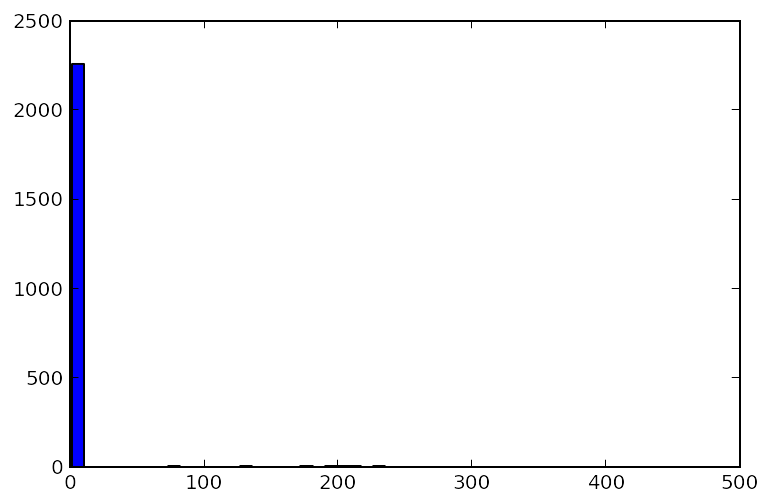

In [5]:
plt.hist(ls,50)

In [219]:
print sorted(ls)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [223]:
print sorted([gg.vcount() for gg in g.components().subgraphs()])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Analyze middle name mismatches in identities 

In [214]:
verbose = False

def get_reachable_identities_graph(self, identity):
    '''
    Return a graph of all identities that are reachable from 
    the given identity on the graph of related identities.
    Edge 'weight' can be -1, 0, 1.
    '''
    dict_weights = {0:0,
                    1:1,
                    -1:-100}
    edgelist = {}

    set_reachable_identities = set(self.get_reachable_identities(identity))

    for neighbor in set_reachable_identities:
        dict_related = self.get_related_identities(neighbor)
        for related, weight in dict_related.iteritems():
            if weight == -1 and related not in set_reachable_identities: 
                continue
            edge = tuple(sorted([neighbor,related]))
            edgelist[edge] = dict_weights[weight]
    edgelist = [(key[0],key[1],value) for key,value in edgelist.iteritems()]        
    g = ig.Graph.TupleList(edgelist, weights=True)
    return g




def __partition_graph_of_reachable_identities(g):
    '''
    Find communities in the graph of reachable identities
    using a spinglass clustering algorightm.
    '''
    gg = g.community_spinglass(weights='weight')
#     print len(gg)
    list_components = [[v['name'] for v in component.vs] for component in gg.subgraphs()]
    return list_components




def __get_dict_super_identities(self):
    '''
    Compute all the super identities and for each one determine
    if it has internal middle name conflict. 
    The key is a sorted tuple of all identities reachable from
    one another.
    The value is an integer counting the number of middle name
    conflicts within the set given the edges for which we have
    comparison results.
    '''

    counter = 0
    counter_error = 0
    conflict = False

    dict_super_identities = {}
    set_super_identities = set()

    for identity, x in self.dict_identity_2_list_ids.iteritems():
        reachable = self.get_reachable_identities(identity)
        set_reachable = set(reachable)
        sorted_reachable = tuple(sorted(reachable))

        set_pairs = set()

        if sorted_reachable in dict_super_identities:
            continue
        dict_super_identities[sorted_reachable] = 0

        for r_identity in reachable:
            dict_related = self.get_related_identities(r_identity)
            if not dict_related: continue
            for other, score in dict_related.iteritems():
                if other in set_reachable and score == -1:
                    counter_error += 1

                    current_pair = tuple(sorted([r_identity,other]))
                    if current_pair not in set_pairs:
                        dict_super_identities[sorted_reachable] += 1
                        set_pairs.add(current_pair)

                    if verbose: 
                        print counter_error, " CONFLICT ", len(set_reachable), r_identity, other
                    conflict = True
        counter += 1
    return dict_super_identities

dict_super_identities = __get_dict_super_identities()

print len(dict_super_identities), len([1 for key,value in dict_super_identities.iteritems() if value > 0])





6029226 26312
6029226 7643


In [234]:

def get_set_super_identities(self, dict_super_identities):
    '''
    return a set containing all new super identities.
    This includes all the old ones that didn't require
    partitioning due to middle name conflicts as well
    as new ones resulting from the partitioning of old
    ones with conflicts.
    @param dict_super_identities: a dict where the key
    is a sorted tuple of identities (a super identity)
    and the value is the number of middle name conflicts
    detected within the super identity. 
    @return: set where each item is a sorted tuple of 
    identities.
    '''

    counter =0 

    # The new identities being born including the
    # old ones that didn't need partitioning.
    birth_row = set()

    for key,value in dict_super_identities.iteritems():
        if value == 0 : 
            birth_row.add(key)
            continue

        #The the graph of reachable identities
        g = self.get_reachable_identities_graph(key[0])
        list_components = partition_graph_of_reachable_identities(g)
        for component in list_components:
            birth_row.add(tuple(sorted(component)))

        counter += 1
    
    return birth_row
    
# Get the new set of super identities after middle name
# conflicts are resolved and new super_identities are born.
set_super_identities = get_set_super_identities(dict_super_identities)

print len(set_super_identities)

    


74148


In [211]:
len(idm.dict_identity_2_identities)

865276

## Rougly 1.7% (7,643 out 434,158) of the "super identities" have middle name conflicts. Compared to the total number of super identities (including singletons), this figure is 0.12%

In [55]:
print len(idm.dict_identity_2_identities)
print len(idm.dict_identity_2_list_ids)

865276
6460344


In [56]:
print 7643./434158
print 7643./6460344

0.0176041901796
0.00118306393591


# Size distribution of clusters of S1 identities with middle name conflicts 

(0, 20)

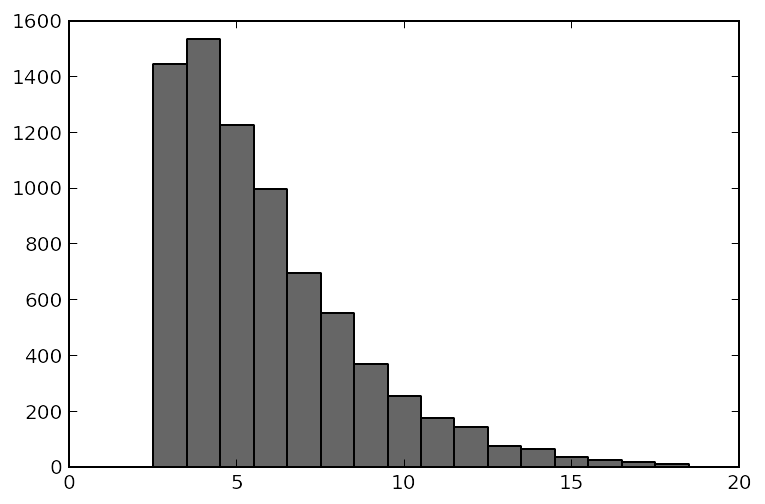

In [110]:
lengths = [len(key) for key, value in dict_super_identities.iteritems() if value > 1]
plt.hist(lengths, bins = np.arange(0,20)-0.5, color=(0.4,0.4,0.4))
plt.xlim((0,20))

# Distribution of number of conflicts within each cluster of  S1 identities

(0, 20)

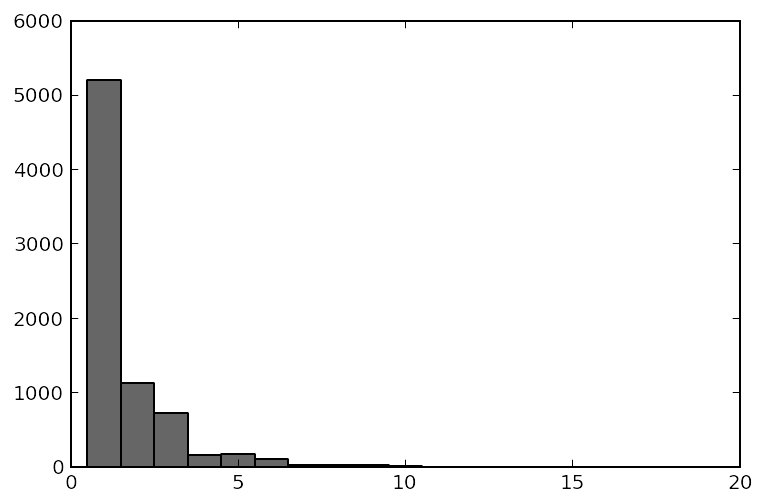

In [137]:
lengths_data = [(len(key),value, key) for key, value in dict_super_identities.iteritems() if value > 0]
lengths = [value for key, value in dict_super_identities.iteritems() if value > 0]
plt.hist(lengths, bins = np.arange(0,20)-0.5, color=(0.4,0.4,0.4))
plt.xlim((0,20))

# Graph clustering with large negative weights 

In [1]:
import igraph as ig
from IPython.display import Image

In [189]:
outfile = 'tmp_output.png'

g = ig.Graph.Erdos_Renyi(6,m=10)

def plot_graph(g):

    dict_c = {1:'blue', -1:'red'}
    get_color = lambda x: 'blue' if x==1 else 'red'

    # g.es['w'] = 1
    # g.es[0]['w'] = -1
    # g.es[5]['w'] = -1

    g.es['c'] = [get_color(x) for x in g.es['weight']]

    ig.plot(g, outfile, edge_color=g.es['c'], edge_width=4, vertex_label=g.vs['name'],
            vertex_label_dist=2, vertex_label_size=20, margin=100)
    

## Test on the graph of related identities for a specific example 

[u'FL-81185', u'FL-81193', u'FL-81229', u'FL-81135', u'FL-81186', u'NY-101293', u'FL-81068']
[u'FL-81134']
[u'FL-81180', u'FL-81216', u'FL-81131', u'FL-81188']


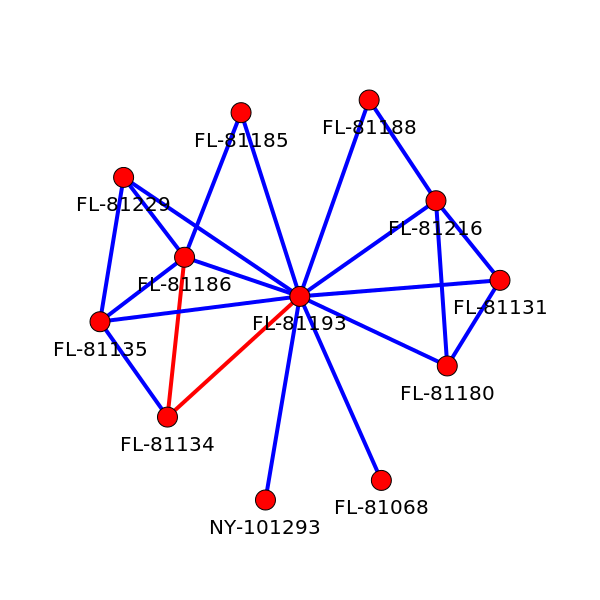

In [235]:
identity = 'FL-81068'
identity = 'FL-81135'


g = get_reachable_identities_graph(identity, idm)
plot_graph(g)
list_components = partition_graph_of_reachable_identities(g)
for component in list_components:
    print component

Image(filename=outfile, width=500)

In [126]:
for identity in (u'CA-381434',
   u'CA-381585',
   u'CO-54649',
   u'FL-186758',
   u'MA-97908',
   u'RI-11799',
   u'VA-102902'):
    p,tmp = get_Person(identity,idm,tokendata_usa)
    print p.get_dominant_attribute('N_first_name'),\
        p.get_dominant_attribute('N_middle_name'),\
        p.get_dominant_attribute('N_last_name')



SELECT NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id FROM usa_combined_v2 WHERE id in (18149822) ;
Done in 0.000734 seconds
Total number of tokens identified:  3
BARBARA None KELLEY
SELECT NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id FROM usa_combined_v2 WHERE id in (8191635,10342703,16951285,18415456,18528364,18749037) ;
Done in 0.000930 seconds
Total number of tokens identified:  13
BARBARA J KELLEY
SELECT NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id FROM usa_combined_v2 WHERE id in (4325467,9174401) ;
Done in 0.067544 seconds
Total number of tokens identified:  13
BARBARA J KELLEY
SELECT NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id FROM usa_combined_v2 WHERE id in (22224320,22224321,22224322,22224

In [106]:
idm.dict_identity_2_identities['CA-18598']

{u'FL-9330': 1L}

In [ ]:
identity = 'FL-81068'
idm.dict

In [8]:
db = Database.DatabaseManager()
result = db.runQuery('select s from (select  left(identity,2) as s,count(*) as c from identities_v5 group by s order by s)t ;')
states = [x[0] for x in result]
print states



[u'AK', u'AL', u'AR', u'AS', u'AZ', u'CO', u'CT', u'DC', u'DE', u'FM', u'GA', u'GU', u'HI', u'IA', u'ID', u'IL', u'IN', u'KS', u'KY', u'LA', u'MA', u'MD', u'ME', u'MH', u'MI', u'MN', u'MO', u'MP', u'MS', u'MT', u'NC', u'ND', u'NE', u'NH', u'NJ', u'NM', u'NV', u'OH', u'OK', u'OR', u'PA', u'PR', u'RI', u'SC', u'SD', u'TN', u'TX', u'UT', u'VA', u'VI', u'VT', u'WA', u'WI', u'WV', u'WY']


{'AK': 'alaska',
 'AL': 'alabama',
 'AR': 'arkansas',
 'AS': 'americansamoa',
 'AZ': 'arizona',
 'CA': 'california',
 'CO': 'colorado',
 'CT': 'connecticut',
 'DC': 'districtofcolumbia',
 'DE': 'delaware',
 'FL': 'florida',
 'FM': 'federatedstatesofmicronesia',
 'GA': 'georgia',
 'GU': 'guam',
 'HI': 'hawaii',
 'IA': 'iowa',
 'ID': 'idaho',
 'IL': 'illinois',
 'IN': 'indiana',
 'KS': 'kansas',
 'KY': 'kentucky',
 'LA': 'louisiana',
 'MA': 'massachusetts',
 'MD': 'maryland',
 'ME': 'maine',
 'MH': 'marshallislands',
 'MI': 'michigan',
 'MN': 'minnesota',
 'MO': 'missouri',
 'MP': 'northernmarianaislands',
 'MS': 'mississippi',
 'MT': 'montana',
 'NC': 'northcarolina',
 'ND': 'northdakota',
 'NE': 'nebraska',
 'NH': 'newhampshire',
 'NJ': 'newjersey',
 'NM': 'newmexico',
 'NV': 'nevada',
 'NY': 'newyork',
 'OH': 'ohio',
 'OK': 'oklahoma',
 'OR': 'oregon',
 'PA': 'pennsylvania',
 'PR': 'puertorico',
 'PW': 'palau',
 'RI': 'rhodeisland',
 'SC': 'southcarolina',
 'SD': 'southdakota',
 'TN':

In [11]:
set(utils.states.dict_state.keys()) - set(states)

{'CA', 'FL', 'NY', 'PW'}

# Combining multiple candidate identity pair files

### We can run the find candidate pairs routine multiple times then combine their results. This may end up being a more efficient way to detect pairs.

In [104]:
import disambiguation.config as config
state = 'USA'

file1 = config.candidate_S1_identity_pairs_file_template % state + "-1"
file2 = config.candidate_S1_identity_pairs_file_template % state + "-2"
file3 = config.candidate_S1_identity_pairs_file_template % state + "-3"




def get_set_pairs(filename,set_pairs = None):
    if set_pairs is None:
        set_pairs = set()
    with open(filename) as f:
        for i,line in enumerate(f):
            pair = tuple(line.strip().split(' '))
    #         print pair
            set_pairs.add(pair)
        

In [105]:
set_pairs = set()
get_set_pairs(file1, set_pairs)
print len(set_pairs)

5942106


In [106]:
get_set_pairs(file2, set_pairs)
print len(set_pairs)

6763391


In [107]:
get_set_pairs(file3, set_pairs)
print len(set_pairs)

11479039


In [108]:
file_combined = config.candidate_S1_identity_pairs_file_template % state
with open(file_combined,'w') as f:
    for pair in set_pairs:
        f.write("%s %s\n" % pair)
        

In [31]:
set_identities = set()
for pair in set_pairs:
    set_identities.add(pair[0])
    set_identities.add(pair[1])
print len(set_identities)
list_identities = list(set_identities)
print len(list_identities)

dict_identity_2_index = {identity:ind for ind,identity in enumerate(list_identities)}

3341413
3341413


In [59]:
from scipy.sparse.linalg import eigs, eigsh
import time

In [57]:
# Create the sparse adjacency matrix of the graph
# of candidate identity pairs.
import numpy as np
from scipy.sparse import dok_matrix
N = len(list_identities)
S = dok_matrix((N,N), dtype=np.float32)
for i,pair in enumerate(set_pairs):
    id0 = dict_identity_2_index[pair[0]]
    id1 = dict_identity_2_index[pair[1]]
    S[id0,id1] = 1
    S[id1,id0] = 1
   

    


In [82]:
print diag.shape
print len(set_pairs)

(3341413, 1)
6763391


In [74]:
# diag = S.dot(np.ones([N,1]))
for i in xrange(N):
    S[i,i] -= diag[i,0]

In [ ]:
t1 = time.time()
es, vs = eigsh(S,2, which='SM')
t2 = time.time()
elspased =  int(t2-t1)
print elapsed

# How long does it take to load the normalized token data? 

In [ ]:
# import time
t1 = time.time()
normalized_tokendata_file = config.tokendata_file_template % ("USA", "Normalized")
with open(normalized_tokendata_file) as f:
    tokendata_usa = utils.cPickle.load(f)
t2 = time.time()

print int(t2-t1)
print "Done!"


# Generate and export the compound identities 

In [5]:
idm = Database.IdentityManager('USA')
# idm.fetch_dict_id_2_identity()
idm.fetch_dict_linked_identities()

Table 'identities_v5' exists.
Table 'identities_adjacency_v5' exists.
Table 'linked_identities_v5' exists.
select identity1, identity2 from linked_identities_v5;


In [ ]:
## Create the table
# query = "CREATE TABLE identities_compound_v5 (id INT PRIMARY KEY, compound_identity VARCHAR(255));"
# print query
# idm.runQuery(query)


with open('outfile.csv', 'w') as f:
    for rid in idm.dict_id_2_identity:
        compound_identity, tmp = idm.get_compound_identity(rid)
        f.write('{id},{identity}\n'.format(id=rid,identity=compound_identity))
#         query = "INSERT INTO identities_compound_v5 (id, compound_identity) VALUES ({rid},'{ident}')".format(rid = rid, ident = compound_identity)
#     #     print query
#         idm.runQuery(query)
    
    

In [31]:
query = "LOAD DATA LOCAL INFILE 'outfile.csv' INTO TABLE identities_compound_v5;"
print query
idm.runQuery(query)

LOAD DATA LOCAL INFILE 'outfile.csv' INTO TABLE identities_compound_v5;


OperationalError: (1148, 'The used command is not allowed with this MySQL version')